In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.10}'.format)
pd.set_option('display.max_columns',50)
import numpy as np

# graph
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder

# font
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
credit = pd.read_csv('../dataset/credit_card_data.csv')
jeju = pd.read_csv('../dataset/jeju_financial_life_data.csv')
print('credit shape: ',credit.shape)
print('jeju shape: ',jeju.shape)

credit shape:  (3888, 26)
jeju shape:  (10422, 27)


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 26 columns):
pop_cd                              3888 non-null object
year                                3888 non-null int64
month                               3888 non-null int64
avg_score                           3888 non-null int64
avg_rat                             3888 non-null int64
city                                3456 non-null object
sex                                 432 non-null object
ages                                3888 non-null object
population                          3888 non-null int64
num_opencard                        3888 non-null float64
num_usecard                         3888 non-null float64
monthly_card_spend                  3888 non-null int64
monthly_lc                          3888 non-null int64
monthly_loan                        3888 non-null int64
monthly_bk_loan                     3888 non-null int64
monthly_cd_loan                     3888 non-n

pop_cd에 따라서 credit을 두 그룹으로 나누었다.
- credit_1 : 성별||연령대 구간(10세단위)
- credit_2 : 지역||연령대 구간(10세단위)

In [4]:
credit_1 = credit[credit.pop_cd.apply(lambda x: True if 'Y' in x else False)]
credit_2 = credit[credit.pop_cd.apply(lambda x: True if 'L' in x else False)]
print('credit shape: ',credit.shape)
print('성별||연령대 구간에 따른 credit shape: ',credit_1.shape)
print('지역||연령대 구간에 따른 credit shape: ',credit_2.shape)

credit shape:  (3888, 26)
성별||연령대 구간에 따른 credit shape:  (432, 26)
지역||연령대 구간에 따른 credit shape:  (3456, 26)


In [5]:
credit_1.pop_cd.unique()

array(['Y10', 'Y15', 'Y20', 'Y25', 'Y30', 'Y35', 'Y40', 'Y45', 'Y50',
       'Y55', 'Y60', 'Y65', 'Y70', 'Y75', 'Y80', 'Y85', 'Y90', 'Y95'],
      dtype=object)

In [6]:
credit_2.pop_cd.unique()

array(['L011', 'L021', 'L031', 'L041', 'L051', 'L061', 'L071', 'L081',
       'L091', 'L101', 'L111', 'L121', 'L131', 'L141', 'L151', 'L161',
       'L012', 'L022', 'L032', 'L042', 'L052', 'L062', 'L072', 'L082',
       'L092', 'L102', 'L112', 'L122', 'L132', 'L142', 'L152', 'L162',
       'L013', 'L023', 'L033', 'L043', 'L053', 'L063', 'L073', 'L083',
       'L093', 'L103', 'L113', 'L123', 'L133', 'L143', 'L153', 'L163',
       'L014', 'L024', 'L034', 'L044', 'L054', 'L064', 'L074', 'L084',
       'L094', 'L104', 'L114', 'L124', 'L134', 'L144', 'L154', 'L164',
       'L015', 'L025', 'L035', 'L045', 'L055', 'L065', 'L075', 'L085',
       'L095', 'L105', 'L115', 'L125', 'L135', 'L145', 'L155', 'L165',
       'L016', 'L026', 'L036', 'L046', 'L056', 'L066', 'L076', 'L086',
       'L096', 'L106', 'L116', 'L126', 'L136', 'L146', 'L156', 'L166',
       'L017', 'L027', 'L037', 'L047', 'L057', 'L067', 'L077', 'L087',
       'L097', 'L107', 'L117', 'L127', 'L137', 'L147', 'L157', 'L167',
      

# Unique Value

In [132]:
credit_1_nuniques = list()
credit_2_nuniques = list()
for col in credit.columns:
    credit_1_nuniques.append(credit_1[col].nunique())
    credit_2_nuniques.append(credit_2[col].nunique())
    
nunique_df = pd.DataFrame({'type':credit.dtypes,'credit_1':credit_1_nuniques, 'credit_2':credit_2_nuniques}, index=credit.columns)
nunique_df

,type,credit_1,credit_2
pop_cd,object,18,144
year,int64,2,2
month,int64,12,12
avg_score,int64,66,116
avg_rat,int64,3,3
city,object,0,16
sex,object,2,0
ages,object,9,9
population,int64,393,751
num_opencard,float64,171,448


# 두 집단간의 통계값이 같은지 확인

두 집단의 인구 총합

In [133]:
print('credit_1의 population 총합: ',credit_1.population.sum())
print('credit_2의 population 총합: ',credit_2.population.sum())

credit_1의 population 총합:  1195008000
credit_2의 population 총합:  1090371000


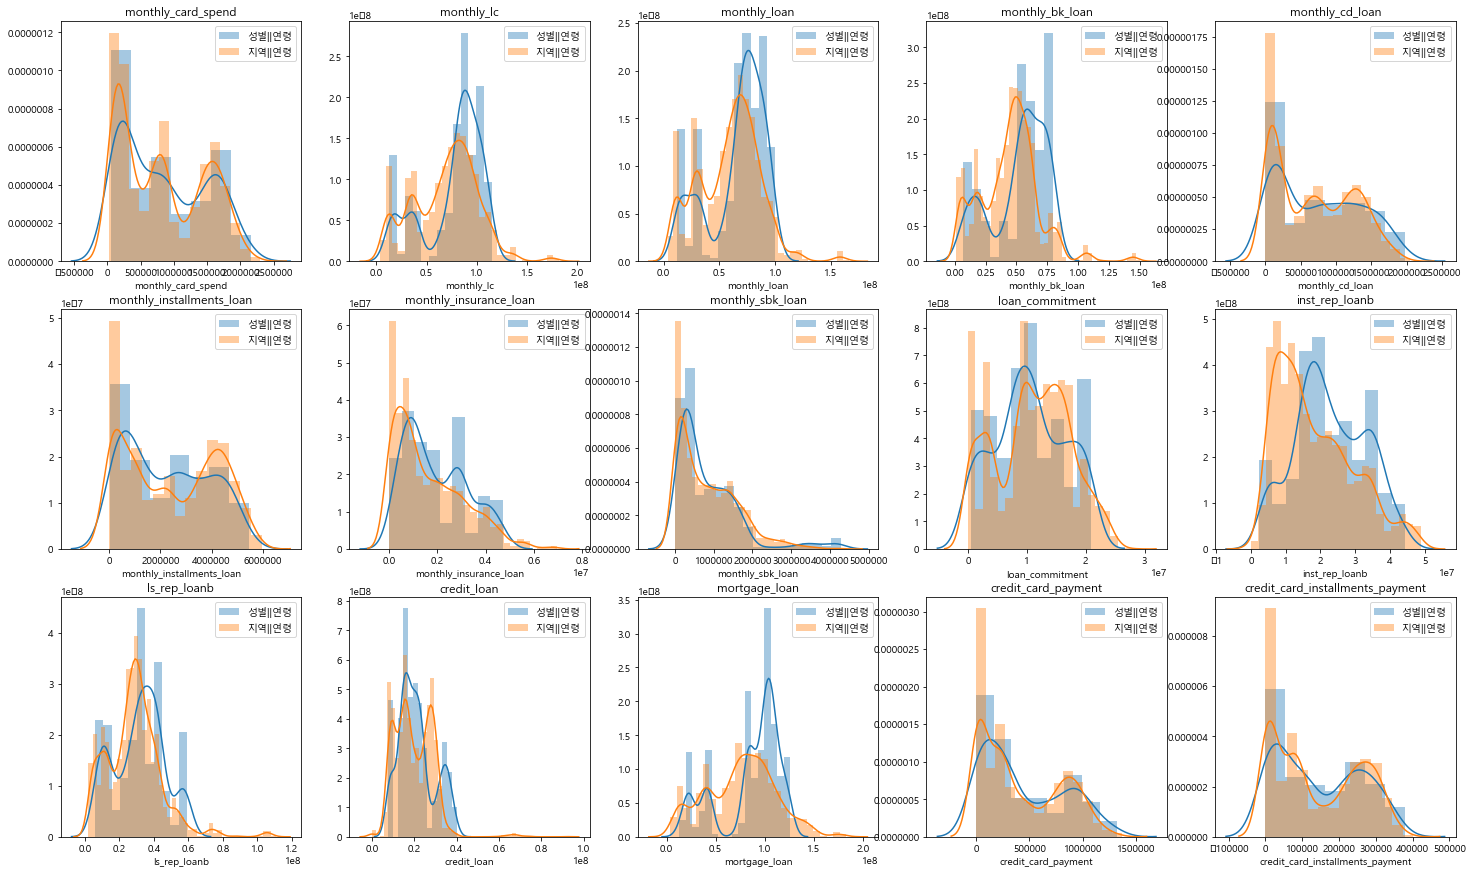

In [134]:
features = credit.columns[11:]
f, ax = plt.subplots(3,5, figsize=(25,15))
for i in range(len(features)):
    sns.distplot(credit_1[features[i]], label='성별||연령', ax=ax[i//5,i%5])
    sns.distplot(credit_2[features[i]], label='지역||연령', ax=ax[i//5,i%5])
    ax[i//5,i%5].set_title(features[i])
    ax[i//5,i%5].legend()

In [136]:
pd.DataFrame({'credit_1_sum':credit_1.iloc[:,11:].sum(axis=0), 'credit_2_sum': credit_2.iloc[:,11:].sum(axis=0)}, index=credit.columns[11:])

,credit_1_sum,credit_2_sum
monthly_card_spend,366980000,2833830000
monthly_lc,33195510000,239177430000
monthly_loan,28508510000,204534390000
monthly_bk_loan,22704000000,154180630000
monthly_cd_loan,327020000,2362670000
monthly_installments_loan,971980000,8366140000
monthly_insurance_loan,839330000,5670990000
monthly_sbk_loan,364570000,2931260000
loan_commitment,4534880000,38190640000
inst_rep_loanb,9814860000,63763210000


In [137]:
credit_1.iloc[:,11:].describe().round(2)

,monthly_card_spend,monthly_lc,monthly_loan,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
count,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0
mean,849490.74,76841458.33,65991921.3,52555555.56,756990.74,2249953.7,1942893.52,843912.04,10497407.41,22719583.33,31687268.52,21045972.22,85763726.85,441650.46,144988.43
std,620494.32,29178819.83,25173190.2,22052740.06,588182.71,1610679.12,1278306.49,827614.03,6012024.9,10095066.92,14443293.08,8251381.83,31422208.14,382301.4,113705.21
min,50000.0,12770000.0,11900000.0,6760000.0,0.0,40000.0,0.0,0.0,490000.0,2310000.0,5890000.0,7750000.0,12920000.0,0.0,0.0
25%,200000.0,67615000.0,56702500.0,41952500.0,160000.0,687500.0,870000.0,277500.0,7037500.0,15892500.0,21030000.0,15140000.0,80932500.0,101750.0,40750.0
50%,775000.0,85920000.0,73780000.0,58205000.0,740000.0,2135000.0,1700000.0,515000.0,10040000.0,21145000.0,33245000.0,19820000.0,98770000.0,308000.0,117000.0
75%,1482500.0,99405000.0,86127500.0,71797500.0,1270000.0,3692500.0,2892500.0,1245000.0,15815000.0,31770000.0,40940000.0,24422500.0,106177500.0,815000.0,253250.0
max,2160000.0,115320000.0,100010000.0,79730000.0,1980000.0,5450000.0,4720000.0,4290000.0,20860000.0,44360000.0,59270000.0,39990000.0,126100000.0,1326000.0,380000.0


In [138]:
credit_2.iloc[:,11:].describe().round(2)

,monthly_card_spend,monthly_lc,monthly_loan,monthly_bk_loan,monthly_cd_loan,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
count,3456.0,3456.0,3456.0,3456.0,3456.0,3456.0,3456.0,3456.0,3456.0,3456.0,3456.0,3456.0,3456.0,3456.0,3456.0
mean,819973.96,69206432.29,59182404.51,44612450.81,683642.94,2420758.1,1640911.46,848165.51,11050532.41,18450002.89,28695494.79,19797815.39,75939502.31,417253.47,141024.02
std,620763.8,31510786.77,27204539.71,23335695.73,549089.03,1791868.97,1425775.14,767910.38,6337682.56,11047469.58,15727650.29,8920733.43,34940240.53,371215.51,115669.03
min,20000.0,3500000.0,3500000.0,1210000.0,0.0,0.0,0.0,0.0,0.0,0.0,2020000.0,0.0,3500000.0,0.0,0.0
25%,210000.0,43500000.0,36805000.0,30267500.0,140000.0,710000.0,490000.0,190000.0,5972500.0,9150000.0,18520000.0,13010000.0,47945000.0,64000.0,25000.0
50%,750000.0,74095000.0,63345000.0,46880000.0,640000.0,2290000.0,1185000.0,650000.0,11355000.0,15735000.0,28635000.0,18405000.0,78500000.0,275500.0,101000.0
75%,1440000.0,90465000.0,77182500.0,57535000.0,1190000.0,4120000.0,2610000.0,1360000.0,15790000.0,25802500.0,36797500.0,26942500.0,99112500.0,782250.0,253000.0
max,2300000.0,181720000.0,165850000.0,150650000.0,2040000.0,5960000.0,6980000.0,4350000.0,28000000.0,48910000.0,110600000.0,92170000.0,183050000.0,1367000.0,402000.0


# 총 대출금액은 업종별 대출금액의 합이거나 보다 작아야한다.

In [139]:
monthly = ['monthly_bk_loan','monthly_cd_loan','monthly_installments_loan','monthly_insurance_loan','monthly_sbk_loan']
credit_1_monthly = pd.DataFrame({'monthly_loan':credit_1.monthly_loan, 'monthly_loan_sum':credit_1[monthly].sum(axis=1)})
credit_2_monthly = pd.DataFrame({'monthly_loan':credit_2.monthly_loan, 'monthly_loan_sum':credit_2[monthly].sum(axis=1)})
credit_1_monthly.loc[:,'diff_'] = credit_1_monthly.monthly_loan - credit_1_monthly.monthly_loan_sum
credit_2_monthly.loc[:,'diff_'] = credit_2_monthly.monthly_loan - credit_2_monthly.monthly_loan_sum

총 대출금액보다 업종별 대출금액의 합이 더 많다.

In [140]:
print('credit_1: ',credit_1_monthly[credit_1_monthly.diff_ < 0].shape[0])
print('credit_2: ',credit_2_monthly[credit_2_monthly.diff_ < 0].shape[0])

credit_1:  0
credit_2:  1


총 대출금액과 업종별 대출금액의 합이 같다

In [141]:
print('credit_1: ',credit_1_monthly[credit_1_monthly.diff_ == 0].shape[0])
print('credit_2: ',credit_2_monthly[credit_2_monthly.diff_ == 0].shape[0])

credit_1:  0
credit_2:  10


총 대출금액보다 업종별 대출금액의 합이 더 적다.

In [142]:
print('credit_1: ',credit_1_monthly[credit_1_monthly.diff_ > 0].shape[0])
print('credit_2: ',credit_2_monthly[credit_2_monthly.diff_ > 0].shape[0])

credit_1:  432
credit_2:  3445


diff_의 distribution

In [143]:
print('credit_1_monthly.diff_의 Mean (std): {} ({})'.format(credit_1_monthly.diff_.mean(), credit_1_monthly.diff_.std()))
print('credit_2_monthly.diff_의 Mean (std): {} ({})'.format(credit_2_monthly.diff_.mean(), credit_2_monthly.diff_.std()))

credit_1_monthly.diff_의 Mean (std): 7642615.740740741 (3332266.8942907997)
credit_2_monthly.diff_의 Mean (std): 8976475.694444444 (5068279.295201708)


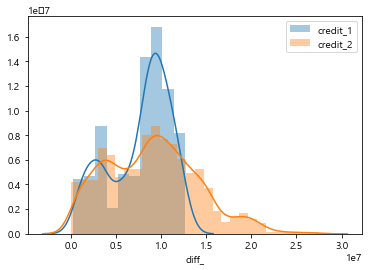

In [144]:
sns.distplot(credit_1_monthly.diff_, label='credit_1')
sns.distplot(credit_2_monthly.diff_, label='credit_2')
plt.legend()

# 총 대출금액과 신용대출 금액의 총합 + 담보대출 금액의 총합이 같은지 확인

- 총 대출 금액은 월별 총 대출 금액이고, 신용대출 금액의 총합 or 담보대출 금액 총합은 전체??

In [145]:
loan = ['credit_loan','mortgage_loan']
credit_1_loan = pd.DataFrame({'monthly_loan':credit_1.monthly_loan, 'loan_sum':credit_1[loan].sum(axis=1)})
credit_2_loan = pd.DataFrame({'monthly_loan':credit_2.monthly_loan, 'loan_sum':credit_2[loan].sum(axis=1)})
credit_1_loan.loc[:,'diff_'] = credit_1_loan.monthly_loan - credit_1_loan.loan_sum
credit_2_loan.loc[:,'diff_'] = credit_2_loan.monthly_loan - credit_2_loan.loan_sum

총 대출금액보다 신용대출 금액의 총합 + 담보대출 금액의 총합이 더 많다.

In [146]:
print('credit_1: ',credit_1_loan[credit_1_loan.diff_ < 0].shape[0])
print('credit_2: ',credit_2_loan[credit_2_loan.diff_ < 0].shape[0])

credit_1:  432
credit_2:  3444


총 대출금액과 신용대출 금액의 총합 + 담보대출 금액의 총합이 같다

In [147]:
print('credit_1: ',credit_1_loan[credit_1_loan.diff_ == 0].shape[0])
print('credit_2: ',credit_2_loan[credit_2_loan.diff_ == 0].shape[0])

credit_1:  0
credit_2:  12


총 대출금액보다 신용대출 금액의 총합 + 담보대출 금액의 총합이 더 적다.

In [148]:
print('credit_1: ',credit_1_loan[credit_1_loan.diff_ > 0].shape[0])
print('credit_2: ',credit_2_loan[credit_2_loan.diff_ > 0].shape[0])

credit_1:  0
credit_2:  0


diff_의 distribution

In [149]:
print('credit_1_loan.diff_의 Mean (std): {} ({})'.format(credit_1_loan.diff_.mean(), credit_1_loan.diff_.std()))
print('credit_2_loan.diff_의 Mean (std): {} ({})'.format(credit_2_loan.diff_.mean(), credit_2_loan.diff_.std()))

credit_1_loan.diff_의 Mean (std): -40817777.777777776 (13218201.406187613)
credit_2_loan.diff_의 Mean (std): -36554913.19444445 (15793442.869652538)


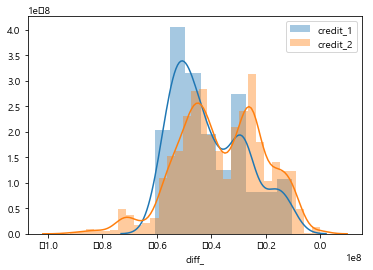

In [150]:
sns.distplot(credit_1_loan.diff_, label='credit_1')
sns.distplot(credit_2_loan.diff_, label='credit_2')
plt.legend()

# 신용대출 금액의 총합 + 담보대출 금액의 총합이  업종별 대출금액의 합과 같은지 확인

In [151]:
loan = ['credit_loan','mortgage_loan']
credit_1_loan_sum = pd.DataFrame({'loan_sum':credit_1[loan].sum(axis=1), 'monthly_loan_sum':credit_1[monthly].sum(axis=1)})
credit_2_loan_sum = pd.DataFrame({'loan_sum':credit_2[loan].sum(axis=1), 'monthly_loan_sum':credit_2[monthly].sum(axis=1)})
credit_1_loan_sum.loc[:,'diff_'] = credit_1_loan_sum.loan_sum - credit_1_loan_sum.monthly_loan_sum
credit_2_loan_sum.loc[:,'diff_'] = credit_2_loan_sum.loan_sum - credit_2_loan_sum.monthly_loan_sum

신용대출 금액의 총합 + 담보대출 금액의 총합보다 업종별 대출금액의 합이 더 많다.

In [152]:
print('credit_1: ',credit_1_loan_sum[credit_1_loan_sum.diff_ < 0].shape[0])
print('credit_2: ',credit_2_loan_sum[credit_2_loan_sum.diff_ < 0].shape[0])

credit_1:  0
credit_2:  1


신용대출 금액의 총합 + 담보대출 금액의 총합과 업종별 대출금액의 합이 같다

In [153]:
print('credit_1: ',credit_1_loan_sum[credit_1_loan_sum.diff_ == 0].shape[0])
print('credit_2: ',credit_2_loan_sum[credit_2_loan_sum.diff_ == 0].shape[0])

credit_1:  0
credit_2:  9


신용대출 금액의 총합 + 담보대출 금액의 총합보다 업종별 대출금액의 합이 더 적다.

In [154]:
print('credit_1: ',credit_1_loan_sum[credit_1_loan_sum.diff_ > 0].shape[0])
print('credit_2: ',credit_2_loan_sum[credit_2_loan_sum.diff_ > 0].shape[0])

credit_1:  432
credit_2:  3446


diff_의 distribution

In [155]:
print('credit_1_loan_sum.diff_의 Mean (std): {} ({})'.format(credit_1_loan_sum.diff_.mean(), credit_1_loan_sum.diff_.std()))
print('credit_2_loan_sum.diff_의 Mean (std): {} ({})'.format(credit_2_loan_sum.diff_.mean(), credit_2_loan_sum.diff_.std()))

credit_1_loan_sum.diff_의 Mean (std): 48460393.518518515 (15891424.443468355)
credit_2_loan_sum.diff_의 Mean (std): 45531388.88888889 (18944864.9888367)


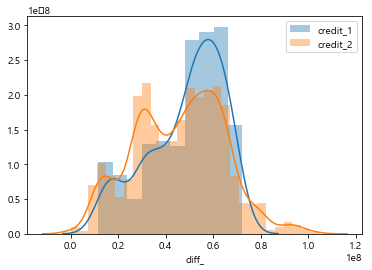

In [156]:
sns.distplot(credit_1_loan_sum.diff_, label='credit_1')
sns.distplot(credit_2_loan_sum.diff_, label='credit_2')
plt.legend()

# 월별 카드 이용 총 금액은 신용카드 일시불 이용금액과 할부 이용금액의 합과 같은지 확인

In [157]:
credit_1.monthly_card_spend

384      50000
385     150000
386     170000
387     180000
388     150000
389     170000
390     160000
391     150000
392     170000
393     170000
394     160000
395     160000
396     170000
397     170000
398     190000
399     200000
400     170000
401     200000
402     180000
403     180000
404     190000
405     190000
406     190000
407     180000
408      50000
409     160000
410     190000
411     210000
412     170000
413     200000
         ...  
3858    170000
3859    180000
3860    180000
3861    190000
3862    190000
3863    170000
3864    100000
3865     80000
3866     80000
3867     90000
3868     80000
3869     90000
3870     80000
3871     90000
3872     90000
3873     90000
3874     90000
3875     80000
3876     90000
3877     80000
3878     80000
3879     90000
3880     80000
3881     90000
3882     90000
3883     90000
3884     90000
3885     90000
3886     90000
3887     90000
Name: monthly_card_spend, Length: 432, dtype: int64

In [158]:
credit_f = ['credit_card_payment','credit_card_installments_payment']
credit_1_card = pd.DataFrame({'card':credit_1.monthly_card_spend, 'card_sum':credit_1[credit_f].sum(axis=1)})
credit_2_card = pd.DataFrame({'card':credit_2.monthly_card_spend, 'card_sum':credit_2[credit_f].sum(axis=1)})
credit_1_card.loc[:,'diff_'] = credit_1_card.card - credit_1_card.card_sum
credit_2_card.loc[:,'diff_'] = credit_2_card.card - credit_2_card.card_sum

월별 카드 이용 총 금액보다 신용카드 일시불 이용금액과 할부 이용금액의 합이 더 많다.

In [159]:
print('credit_1: ',credit_1_card[credit_1_card.diff_ < 0].shape[0])
print('credit_2: ',credit_2_card[credit_2_card.diff_ < 0].shape[0])

credit_1:  0
credit_2:  0


월별 카드 이용 총 금액과 신용카드 일시불 이용금액과 할부 이용금액의 합이 같다

In [160]:
print('credit_1: ',credit_1_card[credit_1_card.diff_ == 0].shape[0])
print('credit_2: ',credit_2_card[credit_2_card.diff_ == 0].shape[0])

credit_1:  0
credit_2:  0


월별 카드 이용 총 금액보다 신용카드 일시불 이용금액과 할부 이용금액의 합이 더 적다.

In [161]:
print('credit_1: ',credit_1_card[credit_1_card.diff_ > 0].shape[0])
print('credit_2: ',credit_2_card[credit_2_card.diff_ > 0].shape[0])

credit_1:  432
credit_2:  3456


diff_의 distribution

In [162]:
print('credit_1_card.diff_의 Mean (std): {} ({})'.format(credit_1_card.diff_.mean(), credit_1_card.diff_.std()))
print('credit_1_card.diff_의 Mean (std): {} ({})'.format(credit_1_card.diff_.mean(), credit_1_card.diff_.std()))

credit_1_card.diff_의 Mean (std): 262851.85185185185 (161521.41014812203)
credit_1_card.diff_의 Mean (std): 262851.85185185185 (161521.41014812203)


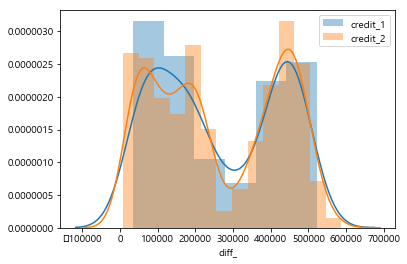

In [163]:
sns.distplot(credit_1_card.diff_, label='credit_1')
sns.distplot(credit_2_card.diff_, label='credit_2')
plt.legend()

# 한도대출 총 약정금액 + 일시상환대출 총 대출잔액 + 분할상환대출 총 대출잔액 = 담보대출

In [164]:
loanb = ['inst_rep_loanb','ls_rep_loanb','loan_commitment']
credit_1_loanb = pd.DataFrame({'mortgage':credit_1.mortgage_loan, 'loanb_sum':credit_1[loanb].sum(axis=1)})
credit_2_loanb = pd.DataFrame({'mortgage':credit_2.mortgage_loan, 'loanb_sum':credit_2[loanb].sum(axis=1)})
credit_1_loanb.loc[:,'diff_'] = credit_1_loanb.mortgage - credit_1_loanb.loanb_sum
credit_2_loanb.loc[:,'diff_'] = credit_2_loanb.mortgage - credit_2_loanb.loanb_sum

월별 카드 이용 총 금액보다 신용카드 일시불 이용금액과 할부 이용금액의 합이 더 많다.

In [165]:
print('credit_1: ',credit_1_loanb[credit_1_loanb.diff_ < 0].shape[0])
print('credit_2: ',credit_2_loanb[credit_2_loanb.diff_ < 0].shape[0])

credit_1:  0
credit_2:  34


In [166]:
credit_2.loc[credit_2_loanb[credit_2_loanb.diff_ < 0].index].ages.value_counts()

10대    34
Name: ages, dtype: int64

In [167]:
credit_2.loc[credit_2_loanb[credit_2_loanb.diff_ < 0].index].city.value_counts()

경북    5
부산    5
전남    5
대전    4
충북    4
전북    4
강원    3
서울    1
대구    1
경기    1
제주    1
Name: city, dtype: int64

월별 카드 이용 총 금액과 신용카드 일시불 이용금액과 할부 이용금액의 합이 같다

In [168]:
print('credit_1: ',credit_1_loanb[credit_1_loanb.diff_ == 0].shape[0])
print('credit_2: ',credit_2_loanb[credit_2_loanb.diff_ == 0].shape[0])

credit_1:  0
credit_2:  10


In [169]:
credit_2.loc[credit_2_loanb[credit_2_loanb.diff_ == 0].index].city.value_counts()

경북    1
대전    1
대구    1
전남    1
부산    1
울산    1
인천    1
제주    1
강원    1
충남    1
Name: city, dtype: int64

In [170]:
credit_2.loc[credit_2_loanb[credit_2_loanb.diff_ == 0].index].ages.value_counts()

10대    10
Name: ages, dtype: int64

월별 카드 이용 총 금액보다 신용카드 일시불 이용금액과 할부 이용금액의 합이 더 적다.

In [171]:
print('credit_1: ',credit_1_loanb[credit_1_loanb.diff_ > 0].shape[0])
print('credit_2: ',credit_2_loanb[credit_2_loanb.diff_ > 0].shape[0])

credit_1:  432
credit_2:  3412


diff_의 distribution

In [172]:
print('credit_1_card.diff_의 Mean (std): {} ({})'.format(credit_1_card.diff_.mean(), credit_1_card.diff_.std()))
print('credit_1_card.diff_의 Mean (std): {} ({})'.format(credit_1_card.diff_.mean(), credit_1_card.diff_.std()))

credit_1_card.diff_의 Mean (std): 262851.85185185185 (161521.41014812203)
credit_1_card.diff_의 Mean (std): 262851.85185185185 (161521.41014812203)


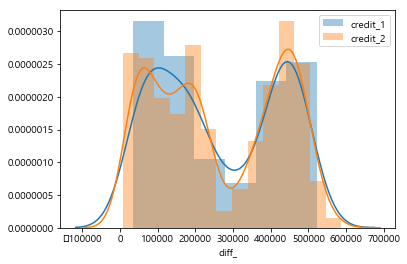

In [173]:
sns.distplot(credit_1_card.diff_, label='credit_1')
sns.distplot(credit_2_card.diff_, label='credit_2')
plt.legend()

# Correlation

In [174]:
encoder = LabelEncoder()
credit_1_corr = credit_1.copy() 
credit_2_corr = credit_2.copy() 
credit_1_corr.sex = encoder.fit_transform(credit_1_corr.sex)
credit_1_corr.ages = encoder.fit_transform(credit_1_corr.ages)
credit_2_corr.sex = encoder.fit_transform(credit_2_corr.sex)
credit_2_corr.ages = encoder.fit_transform(credit_2_corr.ages)

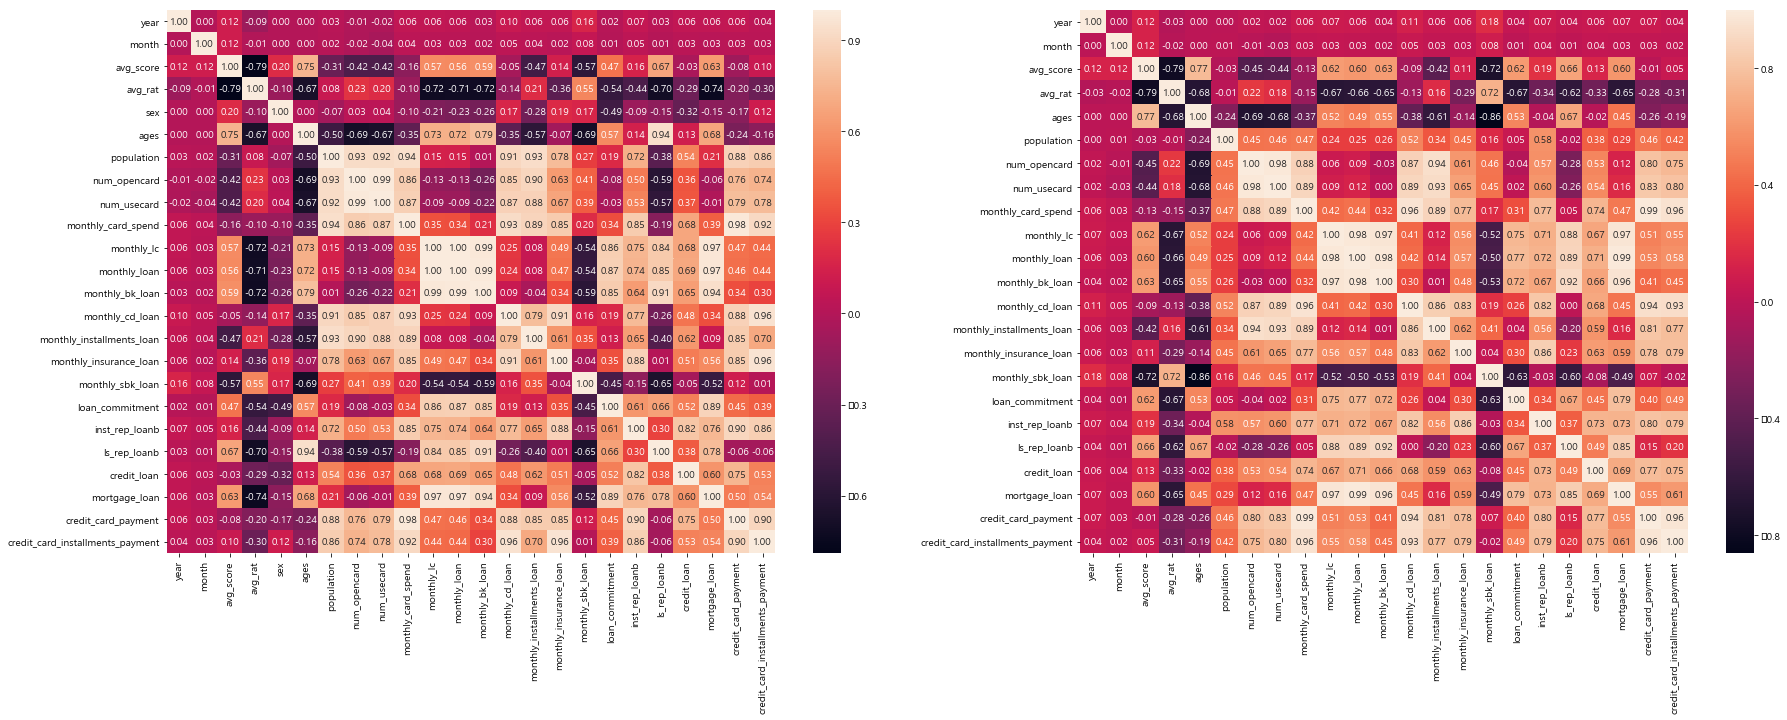

In [175]:
f, ax = plt.subplots(1,2, figsize=(30,10))
corr_1 = credit_1_corr.corr()
corr_2 = credit_2_corr.drop('sex',axis=1).corr()
sns.heatmap(corr_1, annot=True, fmt='.2f', ax=ax[0])
sns.heatmap(corr_2, annot=True, fmt='.2f', ax=ax[1])

# 1차원 적으로 데이터 바라보기

In [176]:
credit_1.loc[:,'monthly_come'] = credit_1.monthly_loan / credit_1.monthly_lc 
credit_2.loc[:,'monthly_come'] = credit_2.monthly_loan / credit_2.monthly_lc

C:\Users\wogur\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\wogur\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## pop_cd를 통해서 credit 데이터보기

In [177]:
count_features = ['year','month','avg_rat']
bar_features = ['year','month','population','avg_score','avg_rat','num_opencard','num_usecard']
box_features = ['monthly_card_spend','monthly_lc','monthly_loan','monthly_bk_loan','monthly_cd_loan','monthly_installments_loan',
               'monthly_insurance_loan','monthly_sbk_loan','loan_commitment','inst_rep_loanb','ls_rep_loanb','credit_loan',
               'mortgage_loan','credit_card_payment','credit_card_installments_payment','monthly_come']

In [178]:
# 원 단위를 만원 단위로 변환
money_features = ['monthly_card_spend','monthly_lc','monthly_loan','monthly_bk_loan','monthly_cd_loan','monthly_installments_loan',
                   'monthly_insurance_loan','monthly_sbk_loan','loan_commitment','inst_rep_loanb','ls_rep_loanb','credit_loan',
                   'mortgage_loan','credit_card_payment','credit_card_installments_payment']
credit_1[money_features] = credit_1[money_features] / 10000
credit_2[money_features] = credit_2[money_features] / 10000

C:\Users\wogur\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [180]:
for i in range(len(count_features)):
    df = pd.DataFrame({'credit_1':credit_1[count_features[i]].value_counts(normalize=True).round(2),
                      'credit_2':credit_2[count_features[i]].value_counts(normalize=True).round(2)},
                      index=credit[count_features[i]].unique())
    print(df)
    print()

      credit_1  credit_2
2016       0.5       0.5
2017       0.5       0.5

    credit_1  credit_2
1       0.08      0.08
2       0.08      0.08
3       0.08      0.08
4       0.08      0.08
5       0.08      0.08
6       0.08      0.08
7       0.08      0.08
8       0.08      0.08
9       0.08      0.08
10      0.08      0.08
11      0.08      0.08
12      0.08      0.08

   credit_1  credit_2
2       0.0      0.01
4      0.27      0.25
3      0.73      0.74



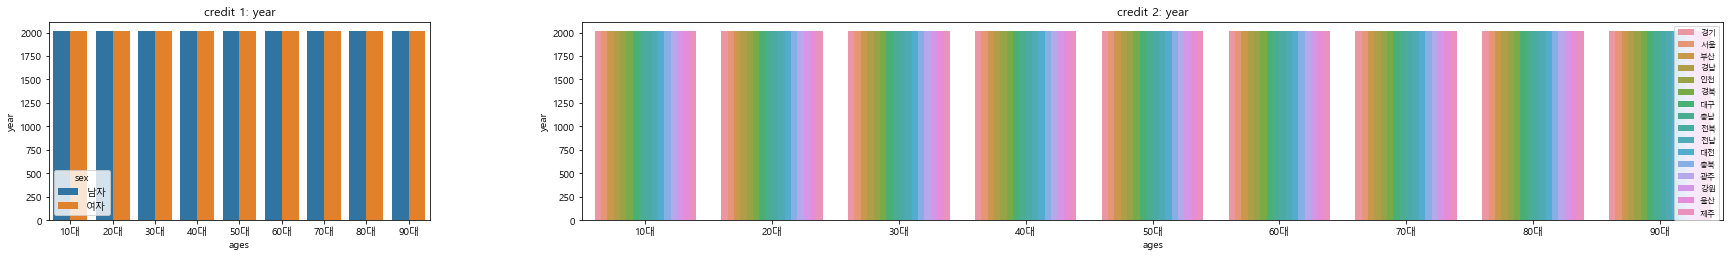

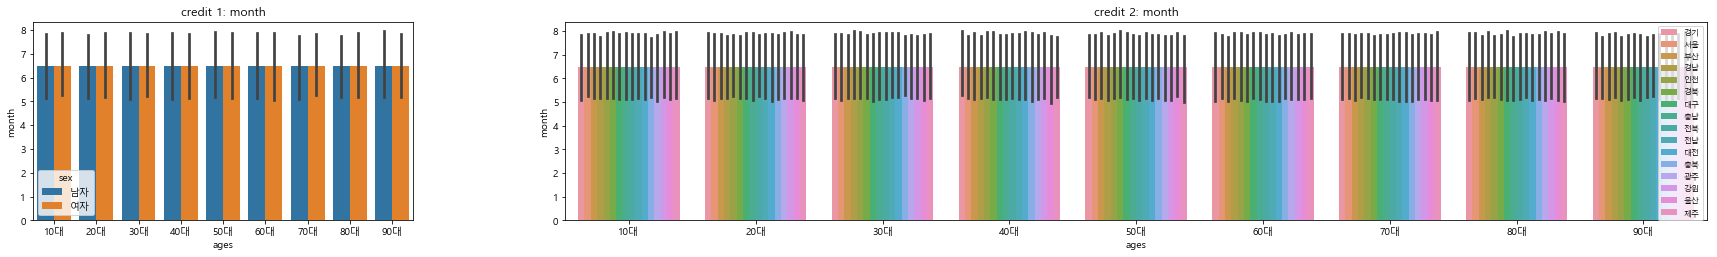

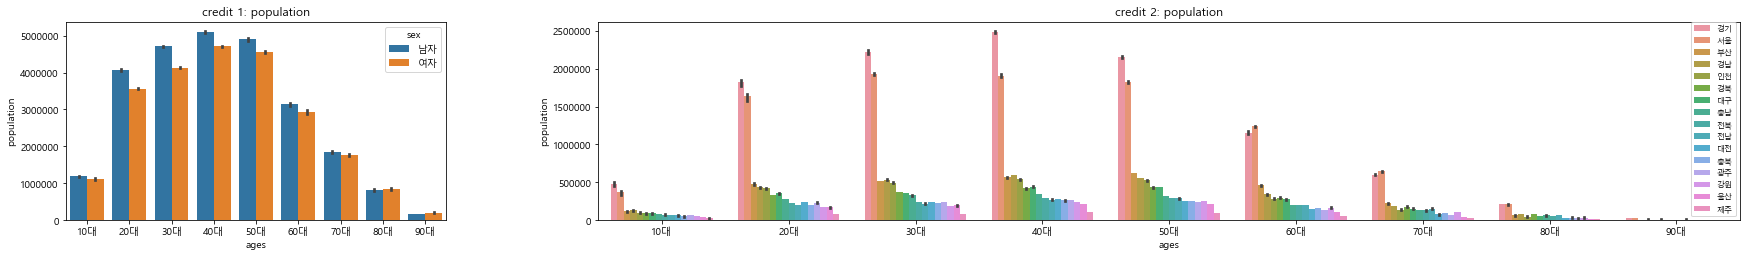

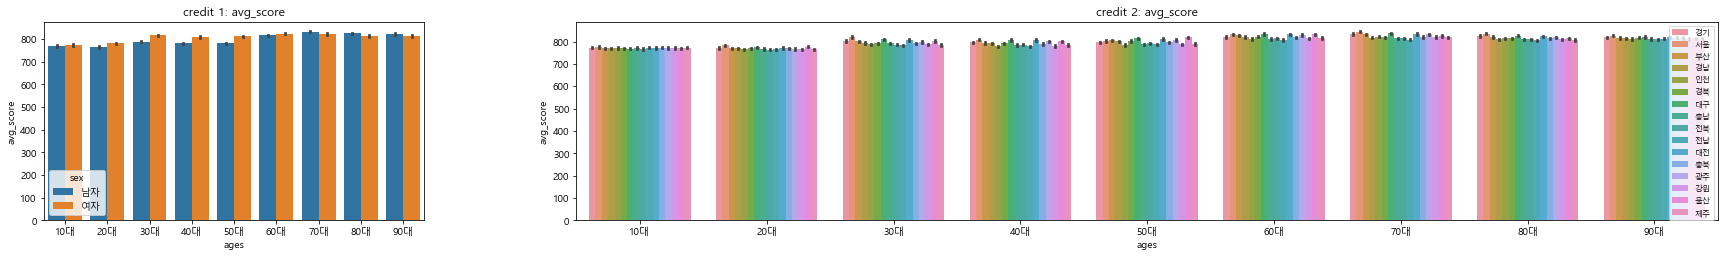

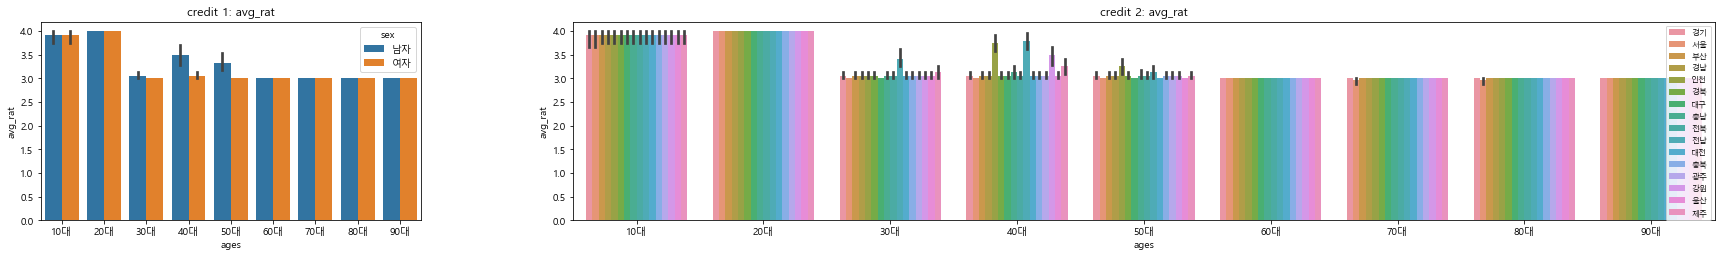

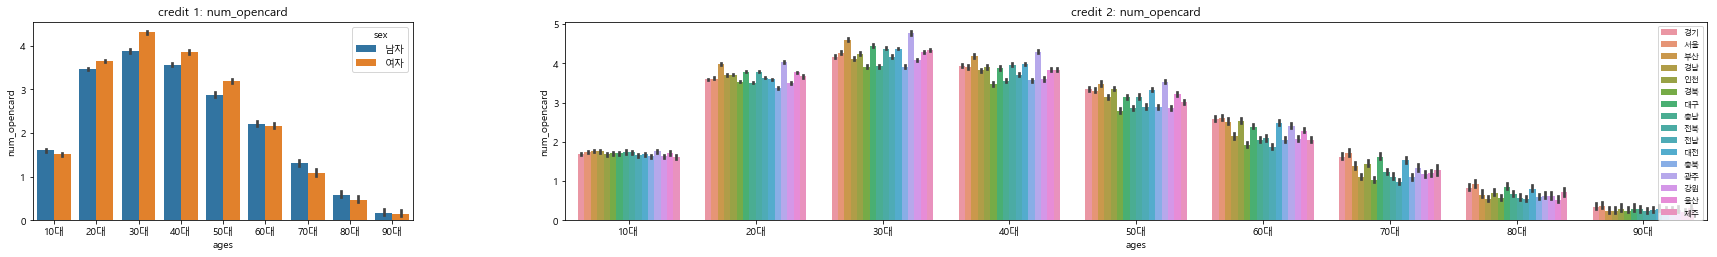

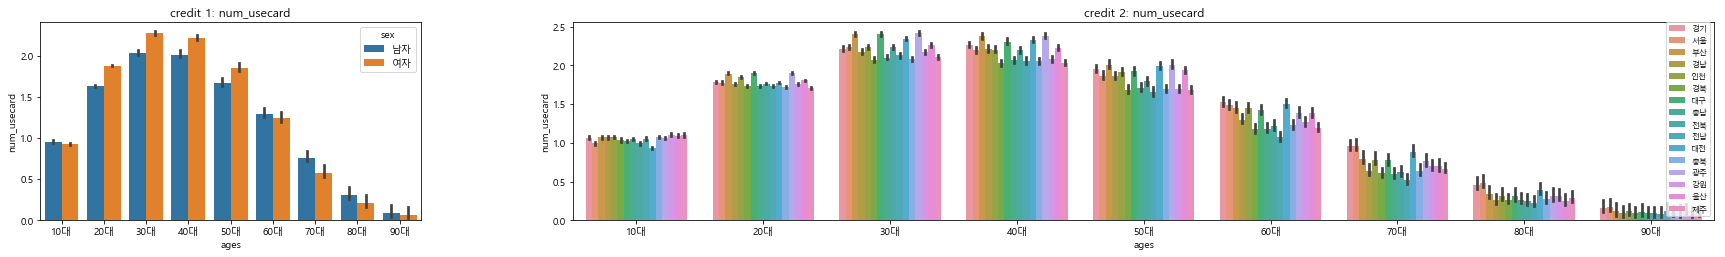

In [181]:
row_num = len(bar_features)
grid = gridspec.GridSpec(row_num, 2, width_ratios=[1, 3])
credit_2_order = credit_2.groupby(['city']).mean()['population'].sort_values(ascending=False).index
for i in range(row_num):
    plt.figure(figsize=(30,30))
    ax1 = plt.subplot(grid[i*2])
    ax2 = plt.subplot(grid[i*2+1])
    sns.barplot(x='ages',y=bar_features[i], hue='sex', data=credit_1, ax=ax1)
    sns.barplot(x='ages',y=bar_features[i], hue='city', hue_order=credit_2_order, data=credit_2, ax=ax2)
    ax1.set_title('credit 1: {}'.format(bar_features[i]))
    ax2.set_title('credit 2: {}'.format(bar_features[i]))
    ax2.legend(fontsize=8)

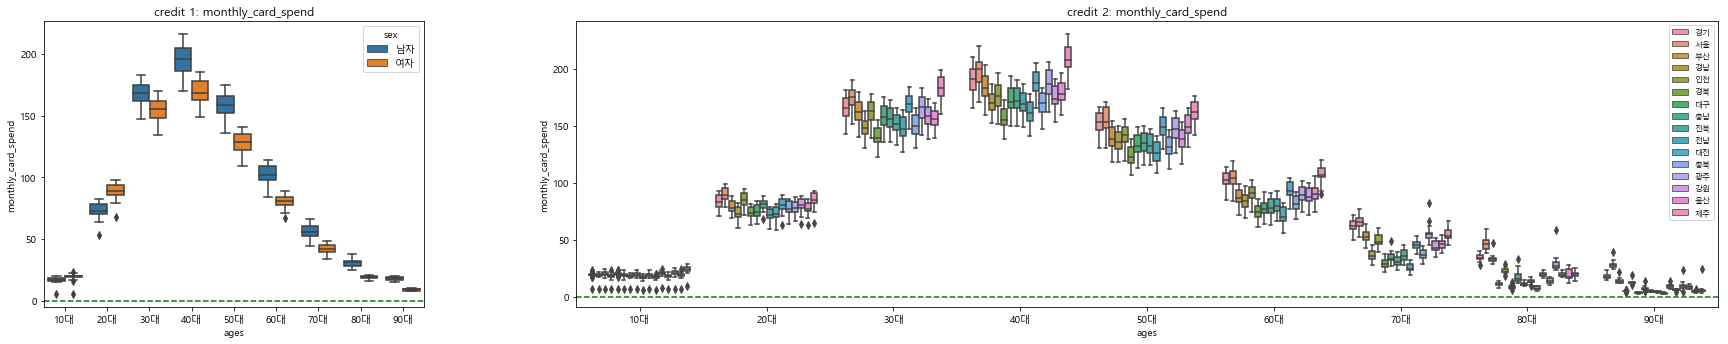

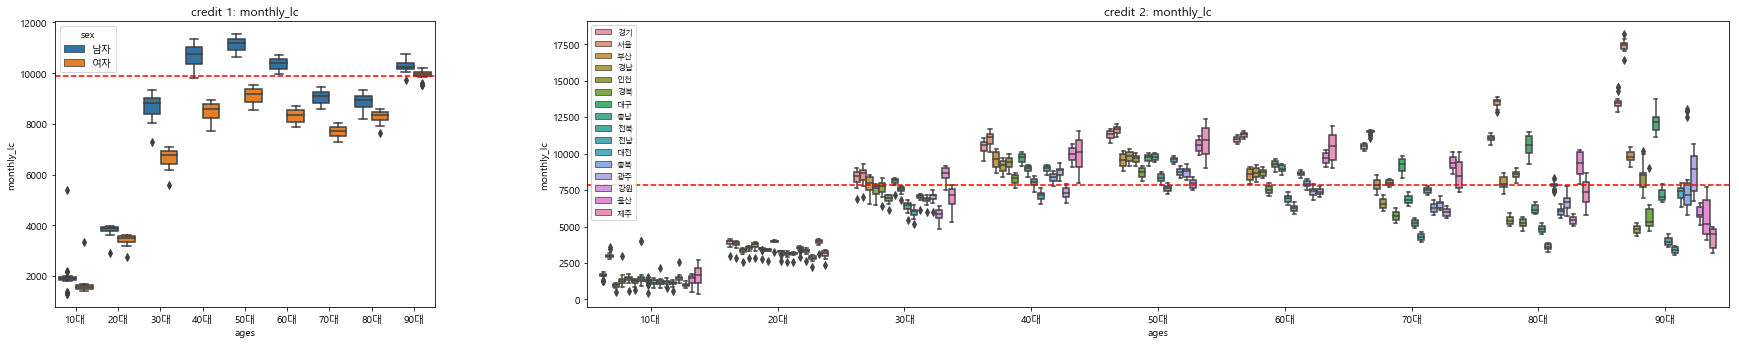

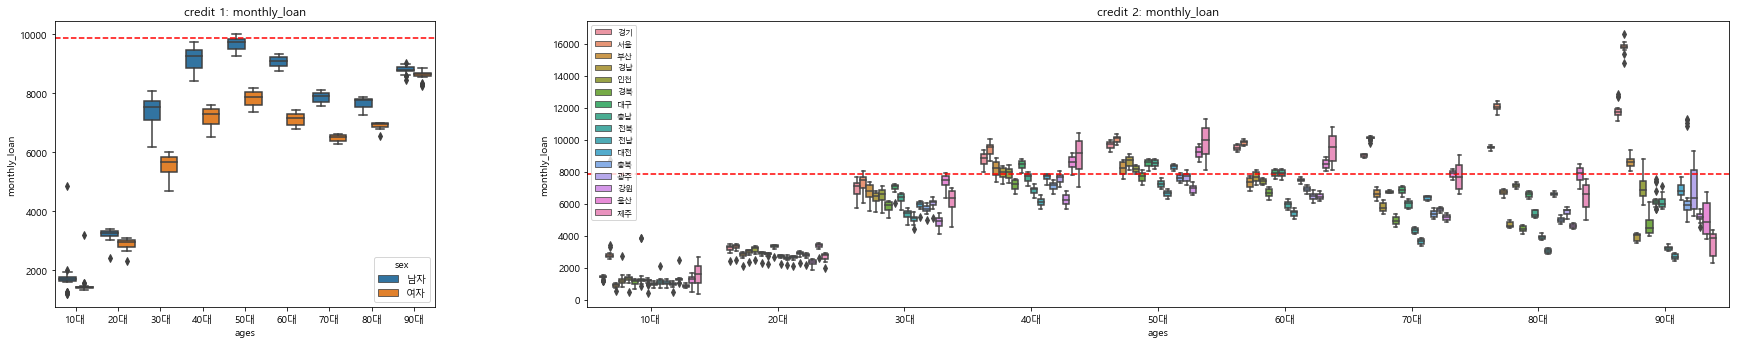

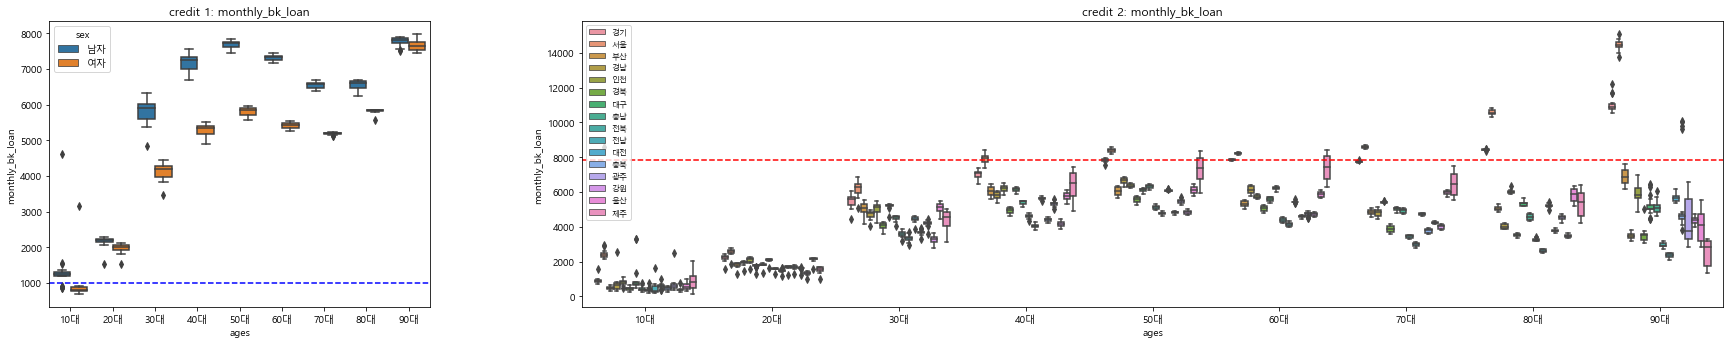

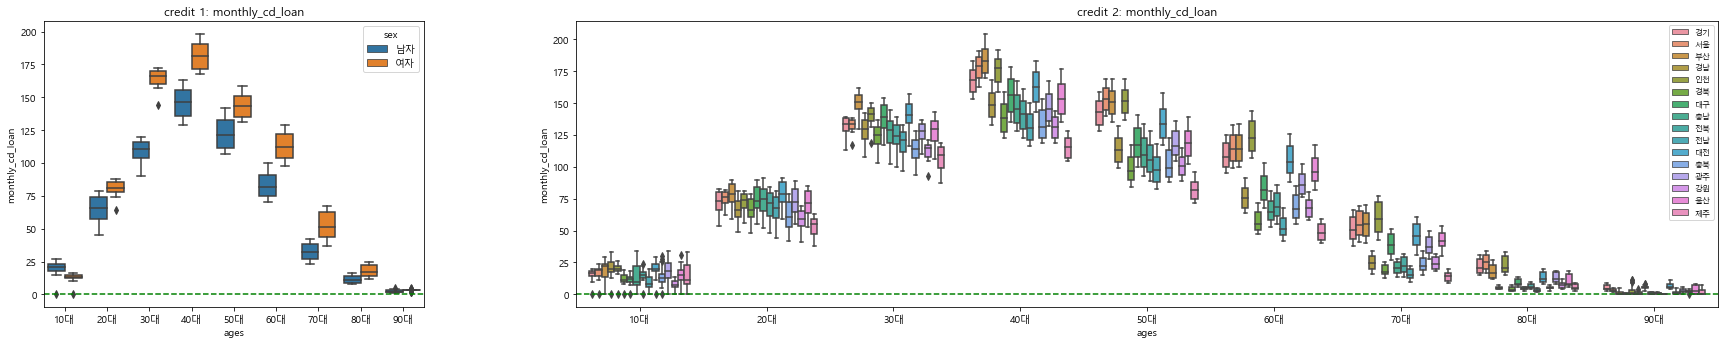

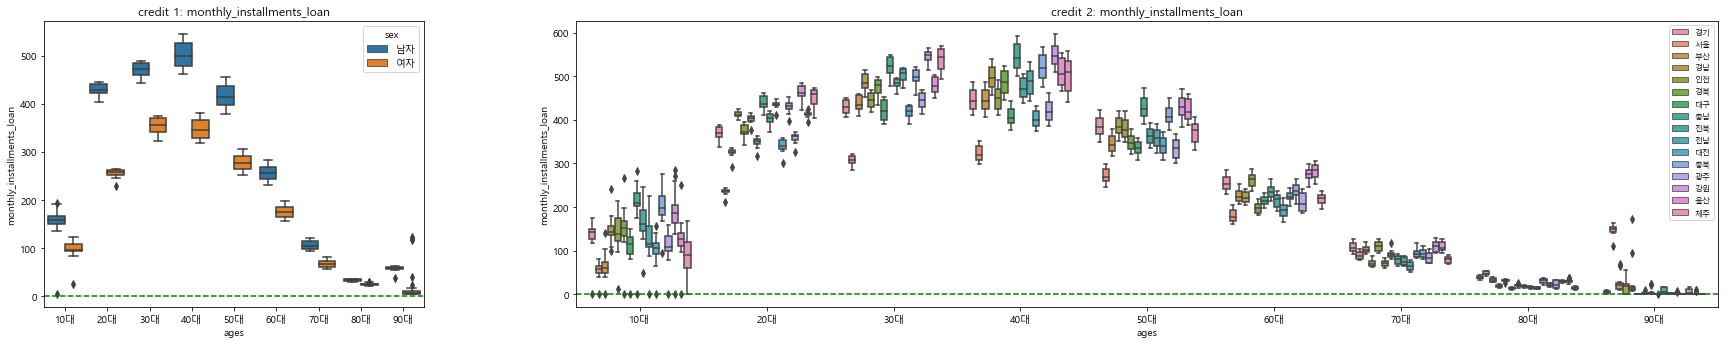

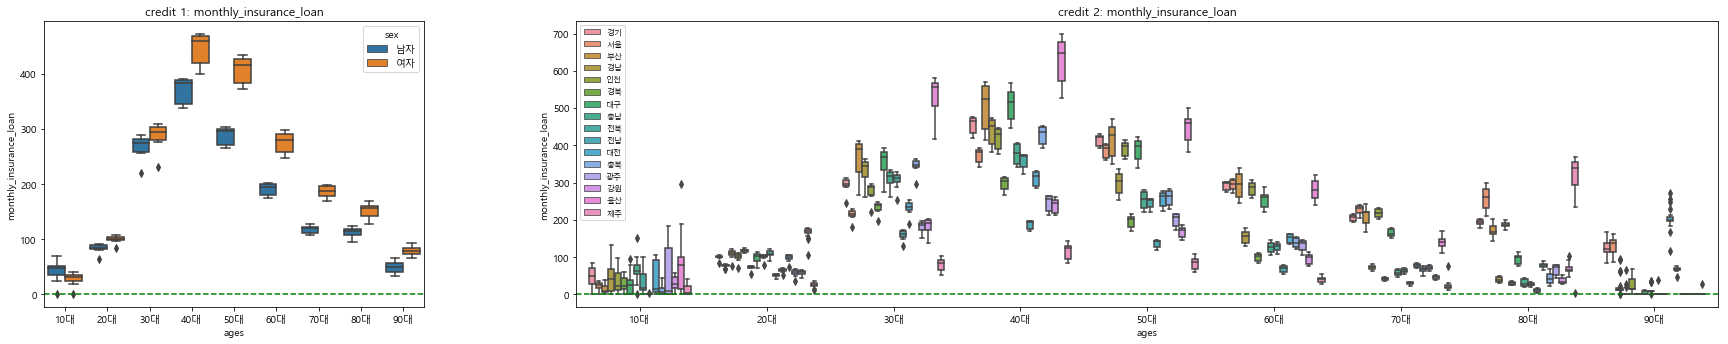

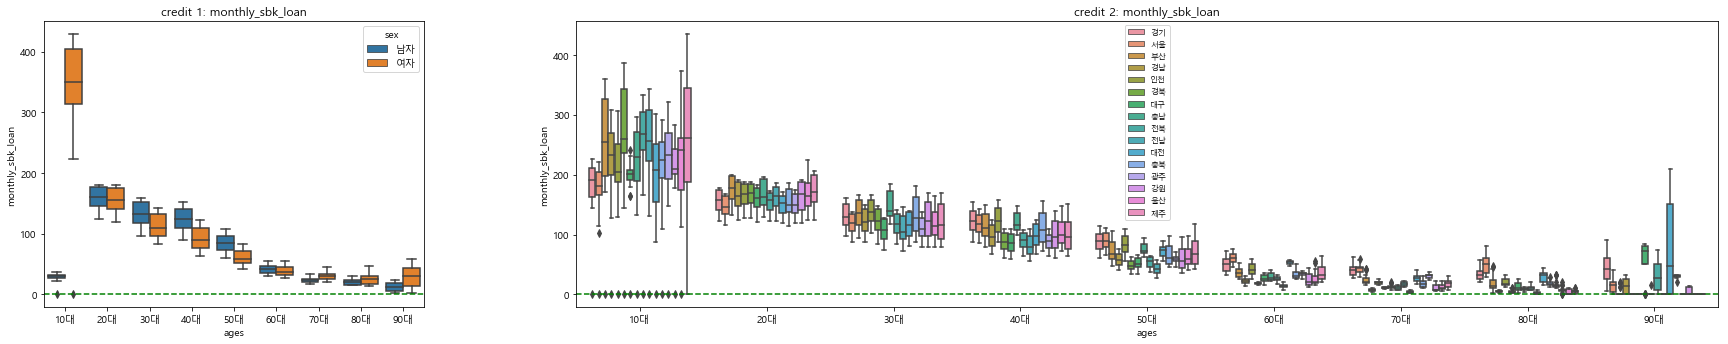

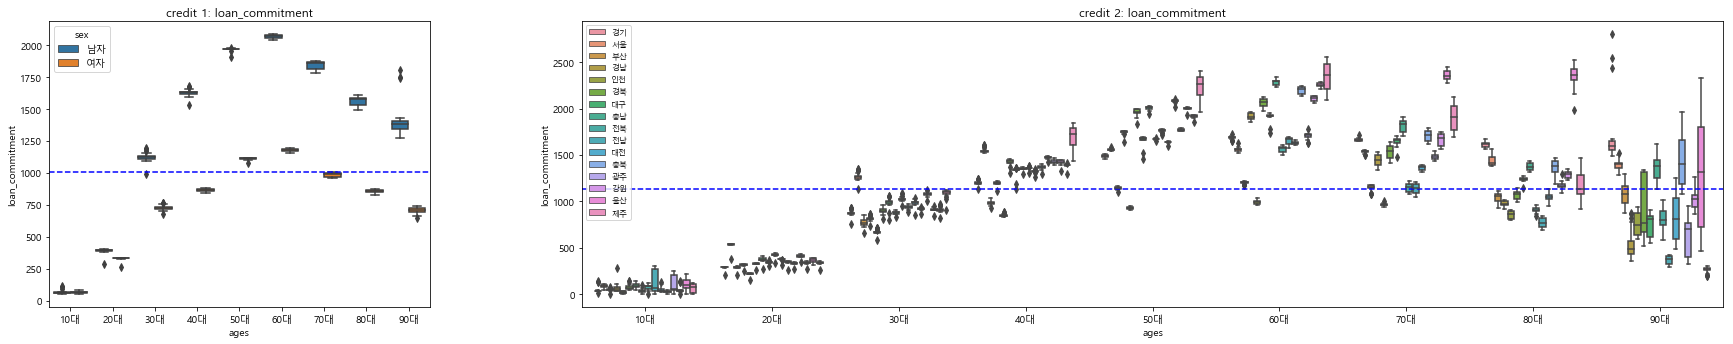

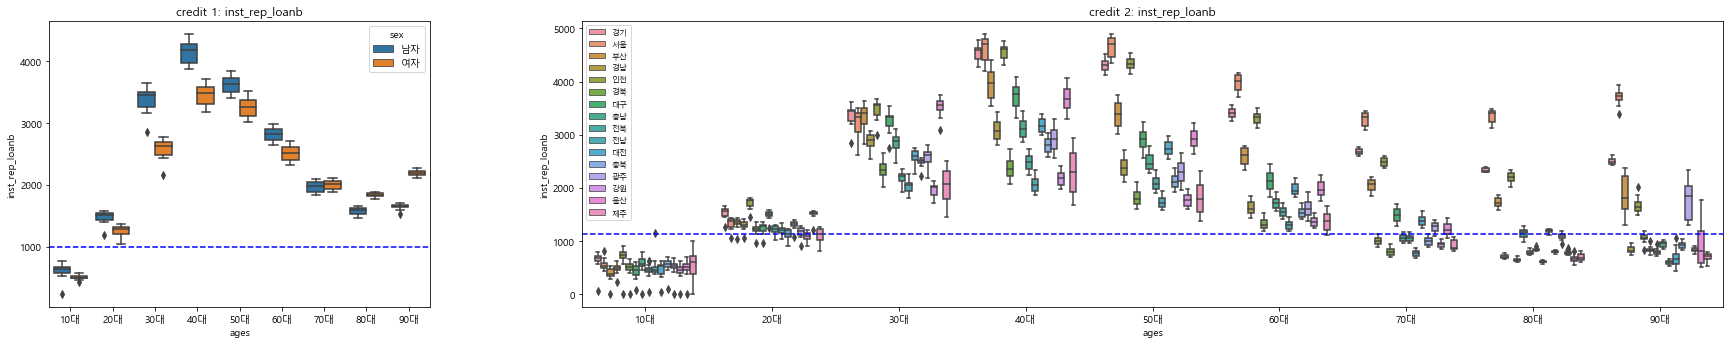

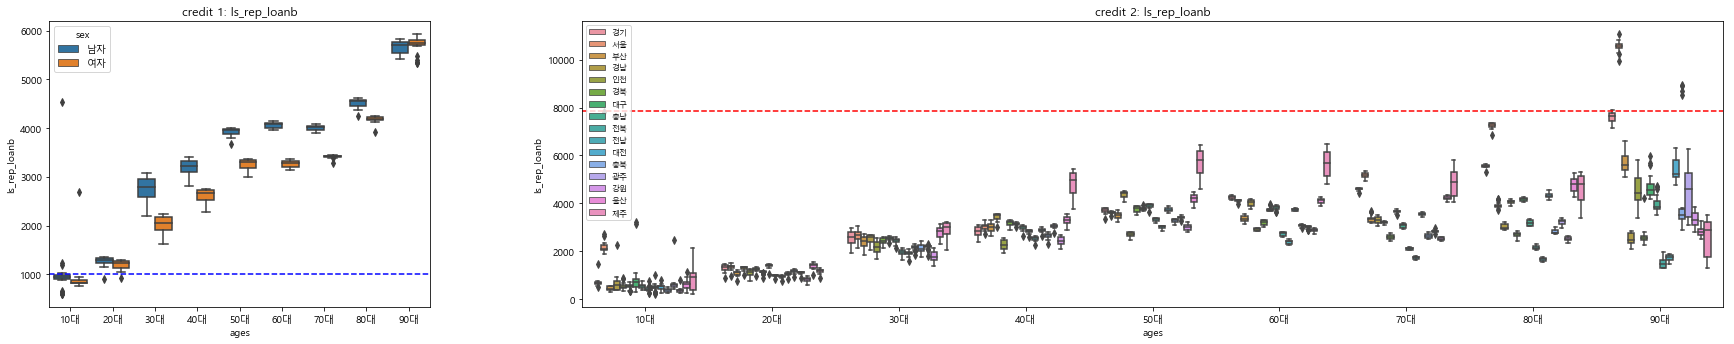

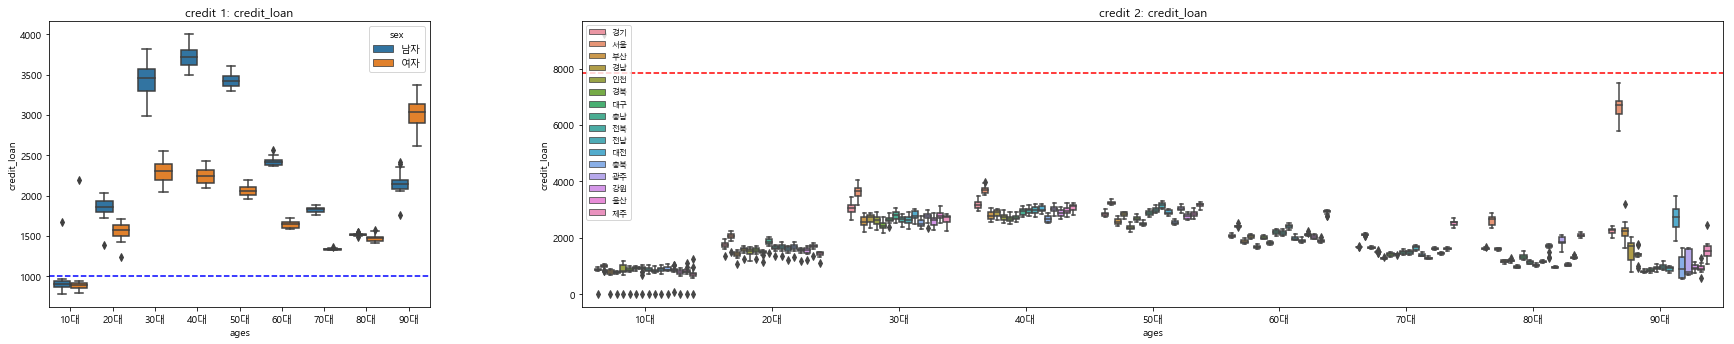

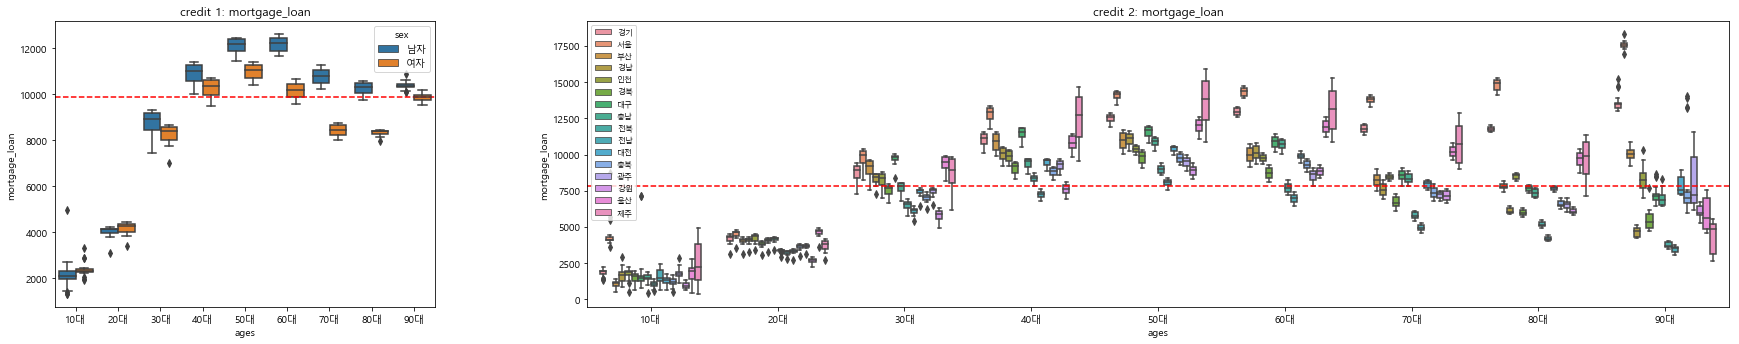

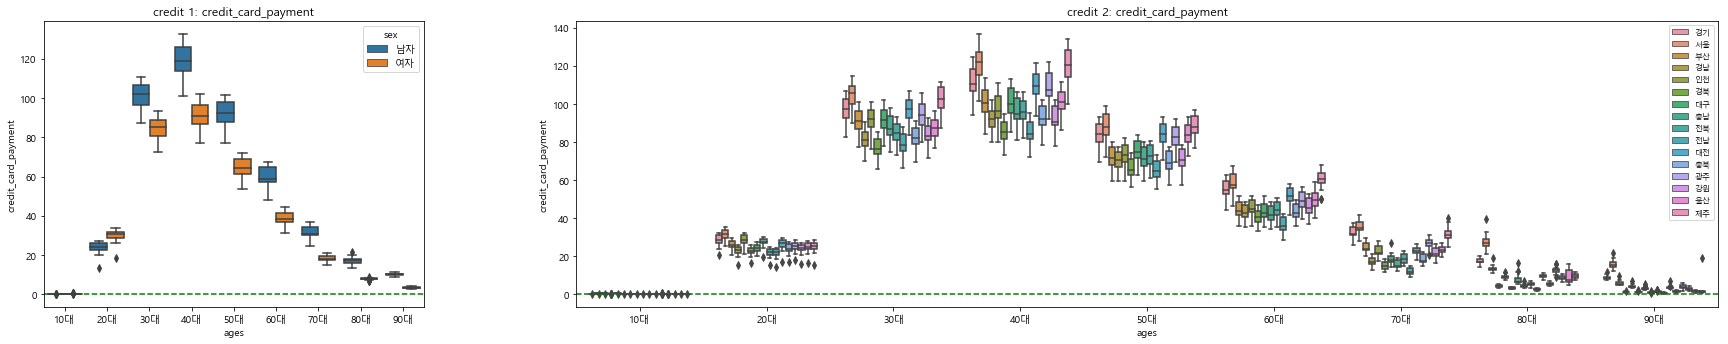

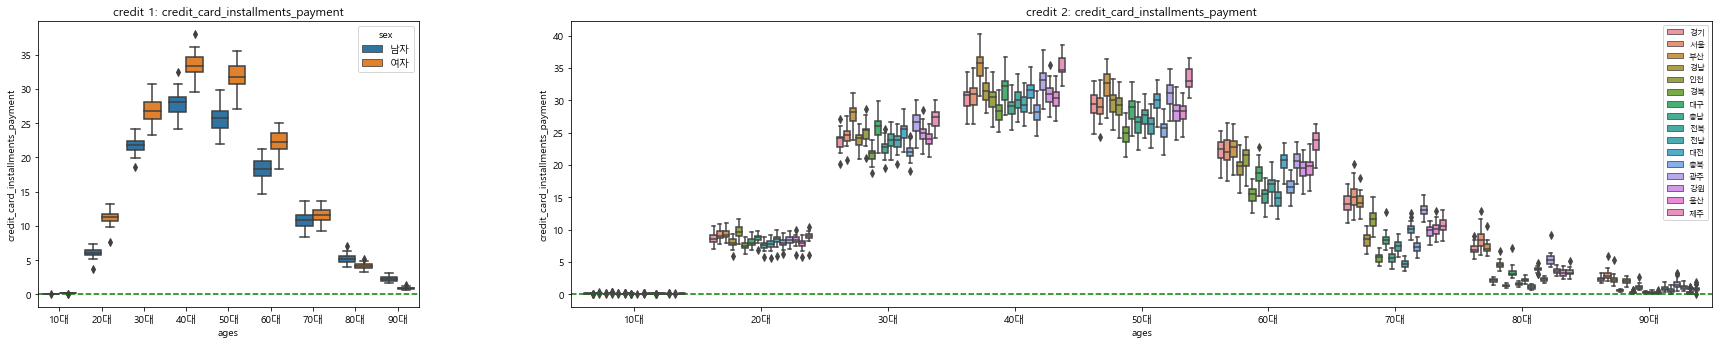

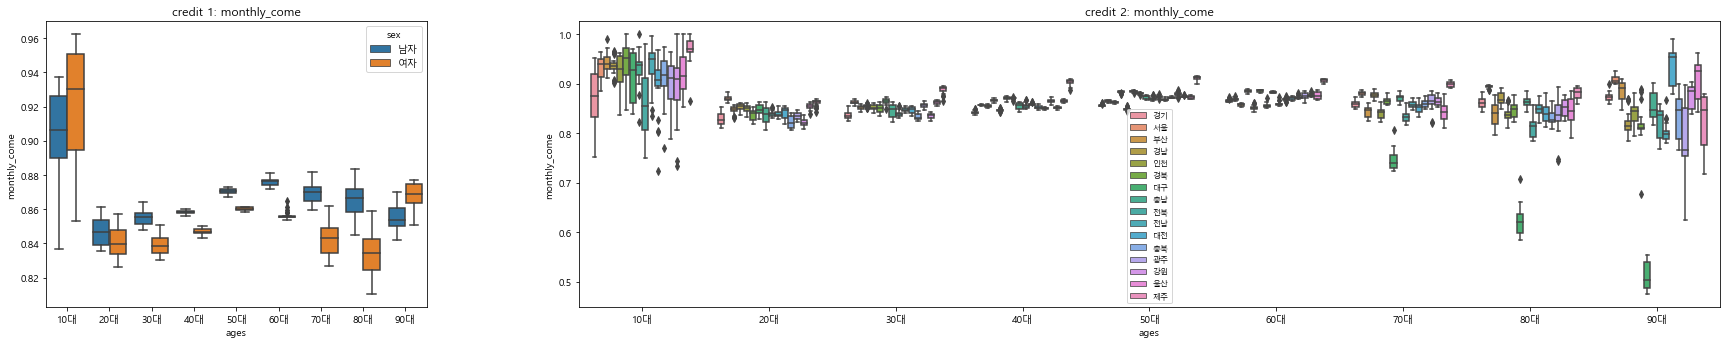

In [191]:
# 변수별 크기 비교를 위해 max, median, min값 계산
credit_1_max = credit_1[money_features].median().max()
credit_2_max = credit_2[money_features].median().max()
credit_1_median = credit_1[money_features].median().median()
credit_2_median = credit_2[money_features].median().median()
credit_1_min = credit_1[money_features].min().min()
credit_2_min = credit_2[money_features].min().min()

# boxplot features 
row_num = len(box_features)
grid = gridspec.GridSpec(row_num, 2, width_ratios=[1, 3])
for i in range(row_num):
    plt.figure(figsize=(30,100))
    ax1 = plt.subplot(grid[i*2])
    ax2 = plt.subplot(grid[i*2+1])
    sns.boxplot(x='ages',y=box_features[i], hue='sex', data=credit_1, ax=ax1)
    sns.boxplot(x='ages',y=box_features[i], hue='city', hue_order=credit_2_order, data=credit_2, ax=ax2)
    ax1.set_title('credit 1: {}'.format(box_features[i]))
    ax2.set_title('credit 2: {}'.format(box_features[i]))
    ax2.legend(fontsize=8)
    if box_features[i]!='monthly_come':
        if credit_1[box_features[i]].max() > credit_1_max:
            ax1.axhline(credit_1_max, linestyle='--', color='r')
        elif credit_1[box_features[i]].max() > credit_1_median:
            ax1.axhline(credit_1_median, linestyle='--', color='b')
        else:
            ax1.axhline(credit_1_min, linestyle='--', color='g')
        
        if credit_2[box_features[i]].max() > credit_2_max:
            ax2.axhline(credit_2_max, linestyle='--', color='r')
        elif credit_2[box_features[i]].max() > credit_2_median:
            ax2.axhline(credit_2_median, linestyle='--', color='b')
        else:
            ax2.axhline(credit_2_min, linestyle='--', color='g')

# 취합 보고서용

## population

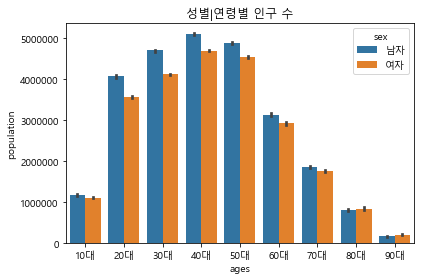

In [201]:
sns.barplot(x='ages',y='population',hue='sex', data=credit_1)
plt.title('성별|연령별 인구 수')
plt.tight_layout()
plt.savefig('../images/ages_by_sex/population.jpg')

In [237]:
credit_1.groupby(['ages','sex']).mean()['population'].reset_index()

,ages,sex,population
0,10대,남자,1191666.667
1,10대,여자,1119041.667
2,20대,남자,4074208.333
3,20대,여자,3566333.333
4,30대,남자,4708625.0
5,30대,여자,4130041.667
6,40대,남자,5105750.0
7,40대,여자,4706000.0
8,50대,남자,4893833.333
9,50대,여자,4554041.667


## num_opencard

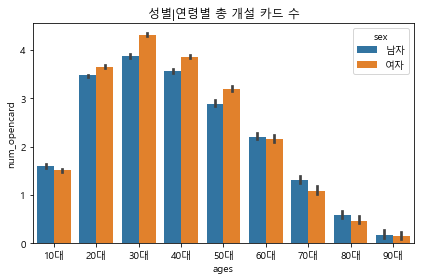

In [203]:
sns.barplot(x='ages',y='num_opencard',hue='sex', data=credit_1)
plt.title('성별|연령별 총 개설 카드 수')
plt.tight_layout()
plt.savefig('../images/ages_by_sex/num_opencard.jpg')

## num_usecard

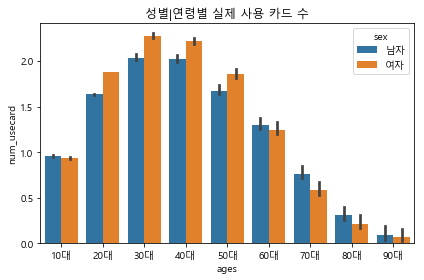

In [204]:
sns.barplot(x='ages',y='num_usecard',hue='sex', data=credit_1)
plt.title('성별|연령별 실제 사용 카드 수')
plt.tight_layout()
plt.savefig('../images/ages_by_sex/num_usecard.jpg')

## avg_score

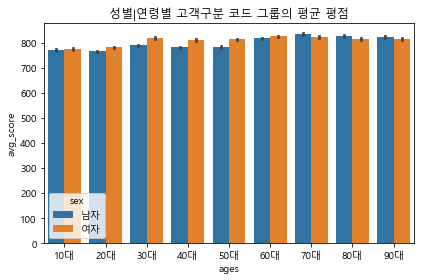

In [246]:
sns.barplot(x='ages',y='avg_score',hue='sex', data=credit_1)
plt.title('성별|연령별 고객구분 코드 그룹의 평균 평점')
plt.tight_layout()
plt.savefig('../images/ages_by_sex/avg_score.jpg')

## avg_rat

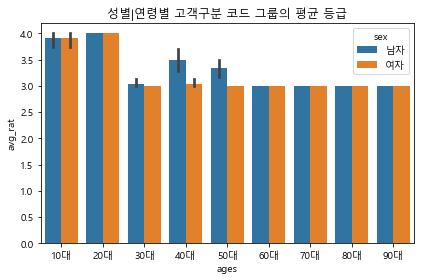

In [247]:
sns.barplot(x='ages',y='avg_rat',hue='sex', data=credit_1)
plt.title('성별|연령별 고객구분 코드 그룹의 평균 등급')
plt.tight_layout()
plt.savefig('../images/ages_by_sex/avg_rat.jpg')

## monthly_card_spend

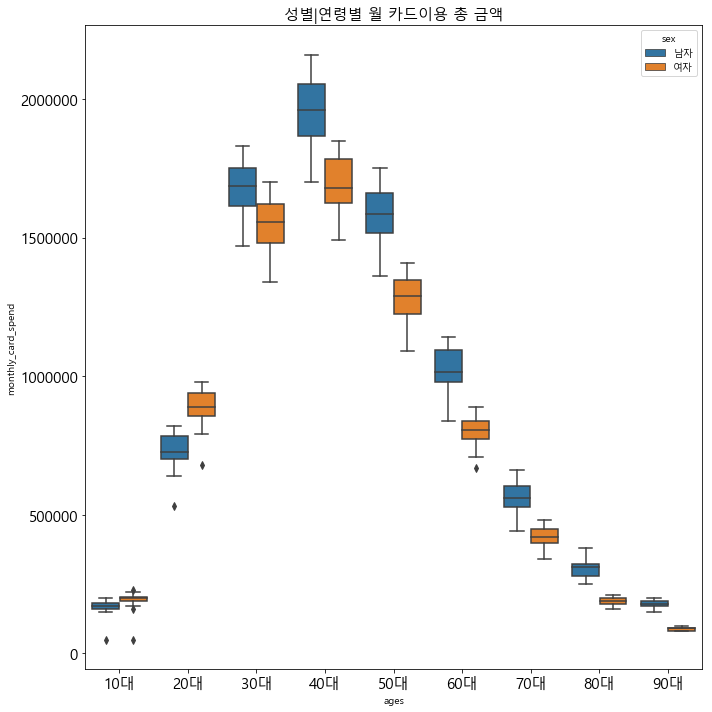

In [7]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='monthly_card_spend',hue='sex', data=credit_1)
plt.title('성별|연령별 월 카드이용 총 금액',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/monthly_card_spend.jpg')

## monthly_lc

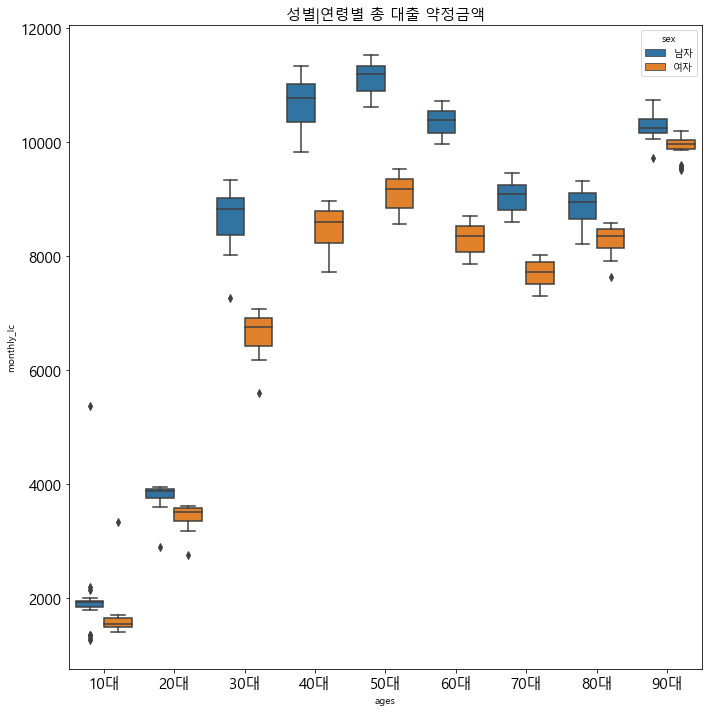

In [215]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='monthly_lc',hue='sex', data=credit_1)
plt.title('성별|연령별 총 대출 약정금액',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/monthly_lc.jpg')

## monthly_loan

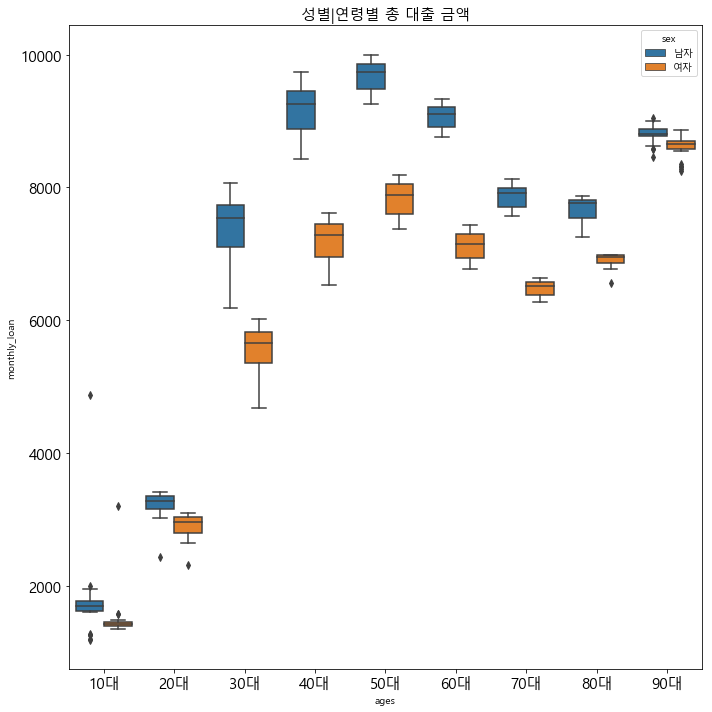

In [217]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='monthly_loan',hue='sex', data=credit_1)
plt.title('성별|연령별 총 대출 금액',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/monthly_loan.jpg')

## monthly_bk_loan

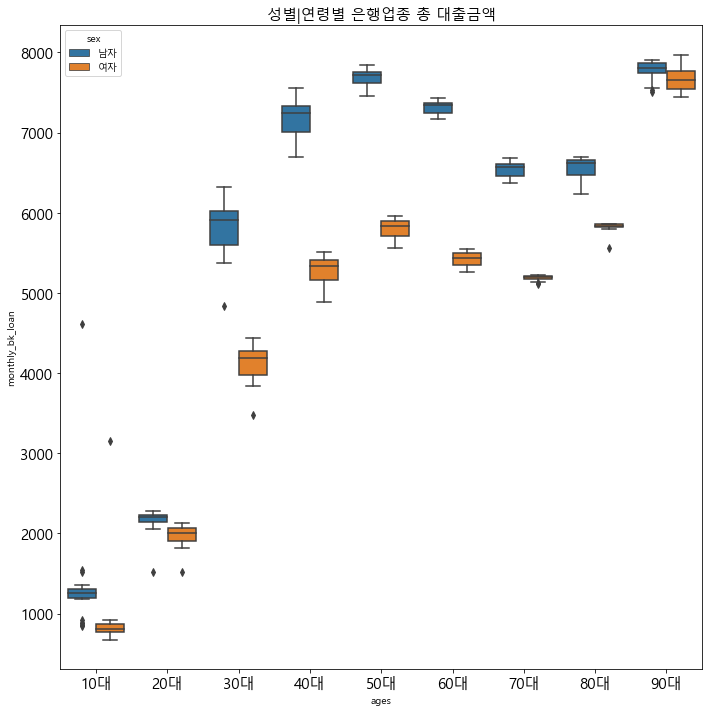

In [218]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='monthly_bk_loan',hue='sex', data=credit_1)
plt.title('성별|연령별 은행업종 총 대출금액',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/monthly_bk_loan.jpg')

## monthly_cd_loan

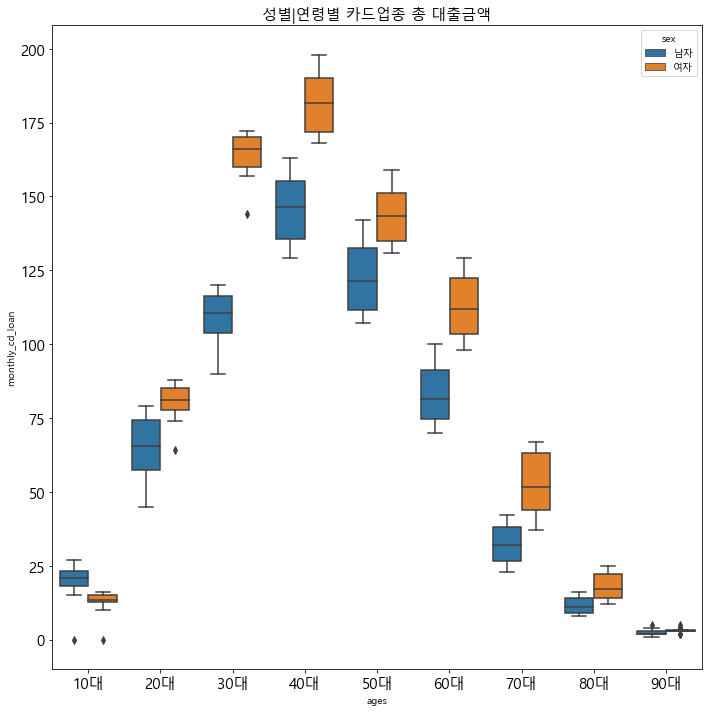

In [219]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='monthly_cd_loan',hue='sex', data=credit_1)
plt.title('성별|연령별 카드업종 총 대출금액',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/monthly_cd_loan.jpg')

## monthly_installments_loan

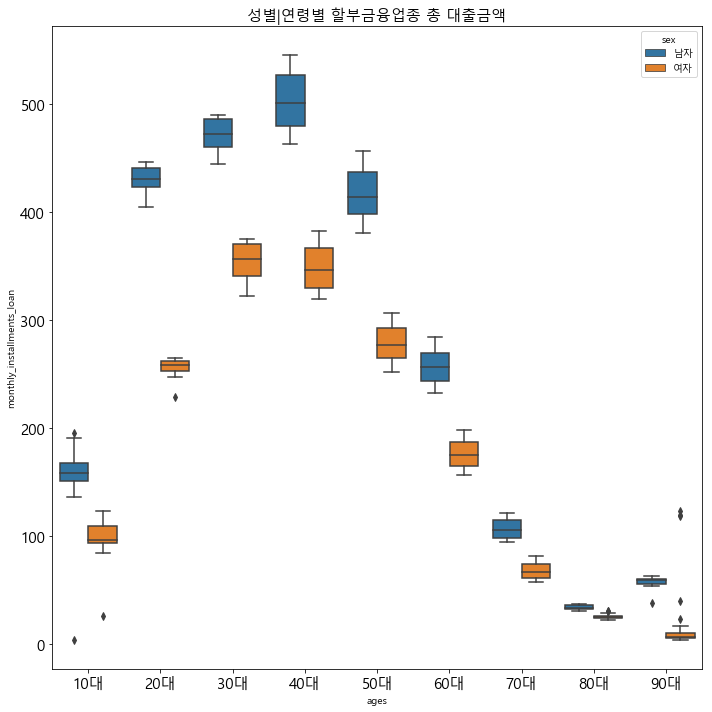

In [220]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='monthly_installments_loan',hue='sex', data=credit_1)
plt.title('성별|연령별 할부금융업종 총 대출금액',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/monthly_installments_loan.jpg')

## monthly_insurance_loan

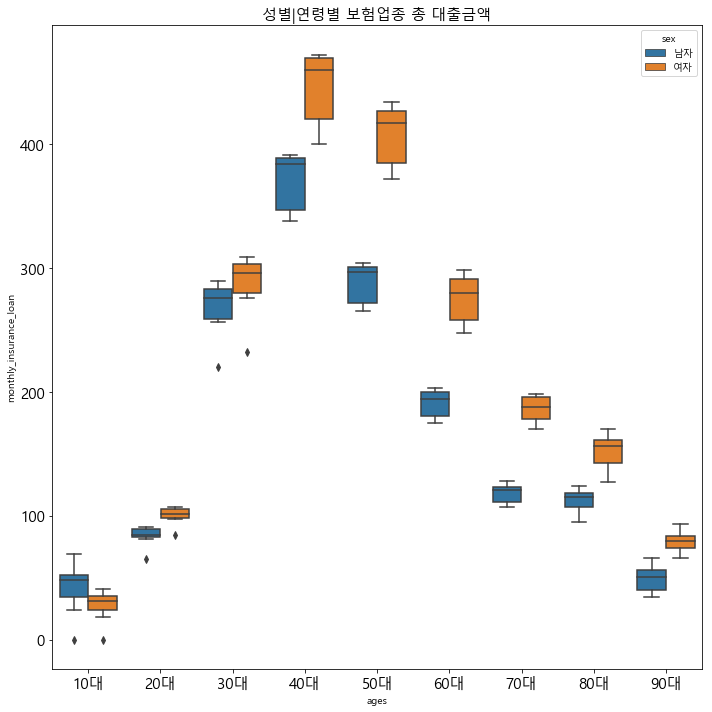

In [222]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='monthly_insurance_loan',hue='sex', data=credit_1)
plt.title('성별|연령별 보험업종 총 대출금액',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/monthly_insurance_loan.jpg')

## monthly_sbk_loan

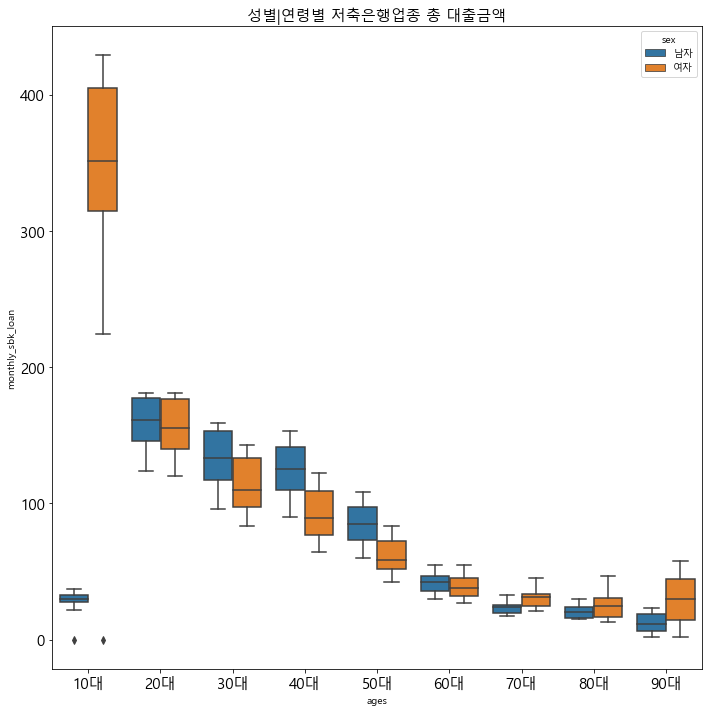

In [223]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='monthly_sbk_loan',hue='sex', data=credit_1)
plt.title('성별|연령별 저축은행업종 총 대출금액',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/monthly_sbk_loan.jpg')

## loan_commitment

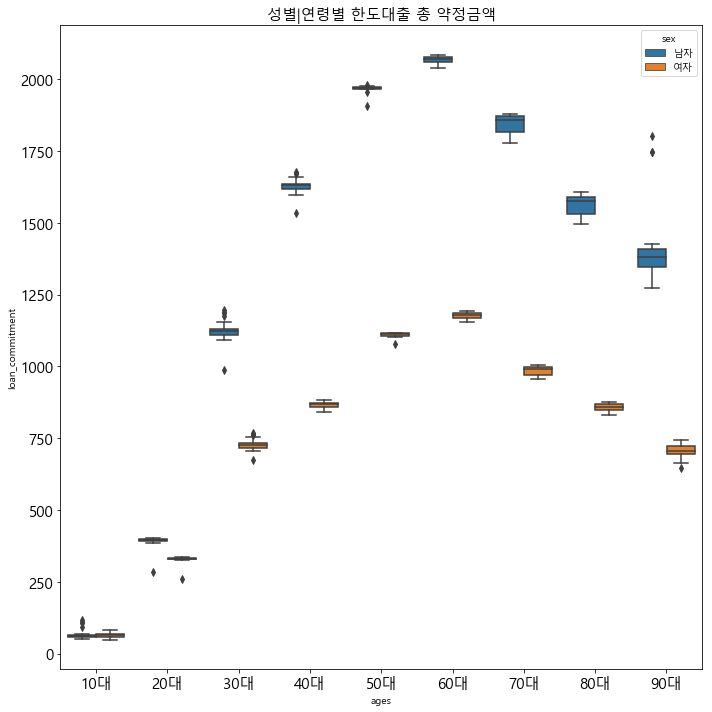

In [224]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='loan_commitment',hue='sex', data=credit_1)
plt.title('성별|연령별 한도대출 총 약정금액',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/loan_commitment.jpg')

## inst_rep_loanb

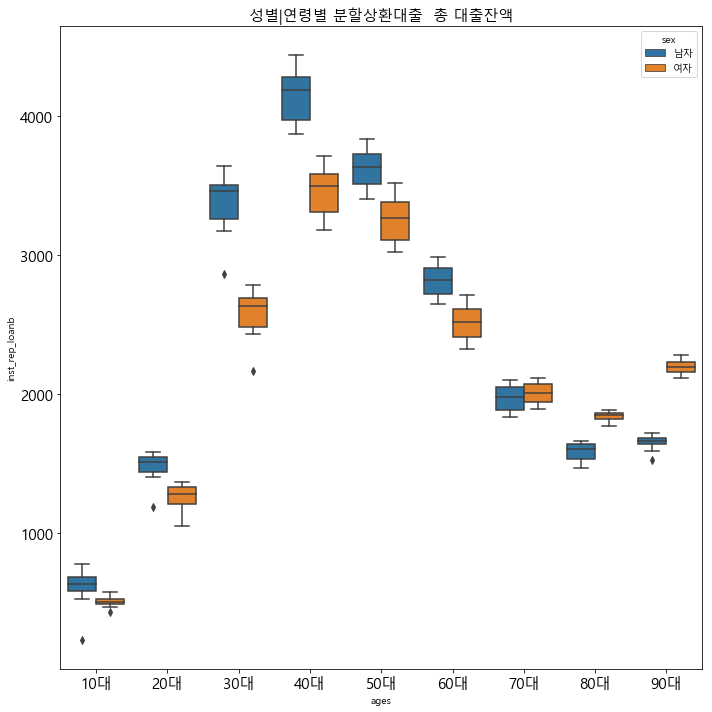

In [225]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='inst_rep_loanb',hue='sex', data=credit_1)
plt.title('성별|연령별 분할상환대출  총 대출잔액',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/inst_rep_loanb.jpg')

## ls_rep_loanb

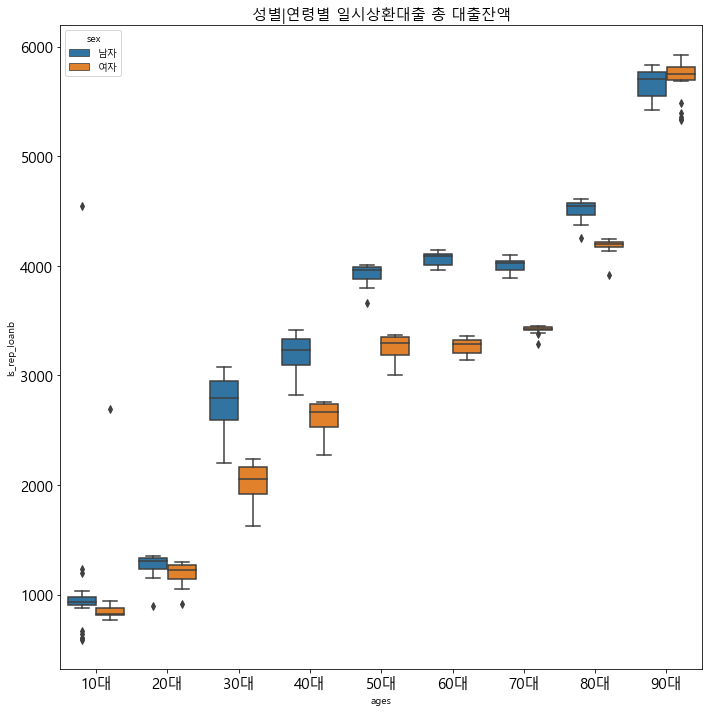

In [226]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='ls_rep_loanb',hue='sex', data=credit_1)
plt.title('성별|연령별 일시상환대출 총 대출잔액',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/ls_rep_loanb.jpg')

## credit_loan

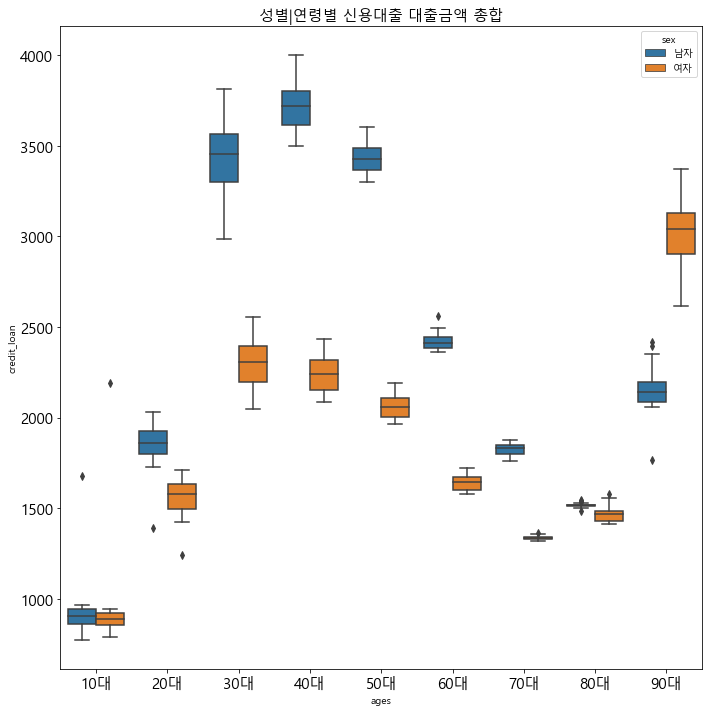

In [227]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='credit_loan',hue='sex', data=credit_1)
plt.title('성별|연령별 신용대출 대출금액 총합',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/credit_loan.jpg')

## mortgage_loan

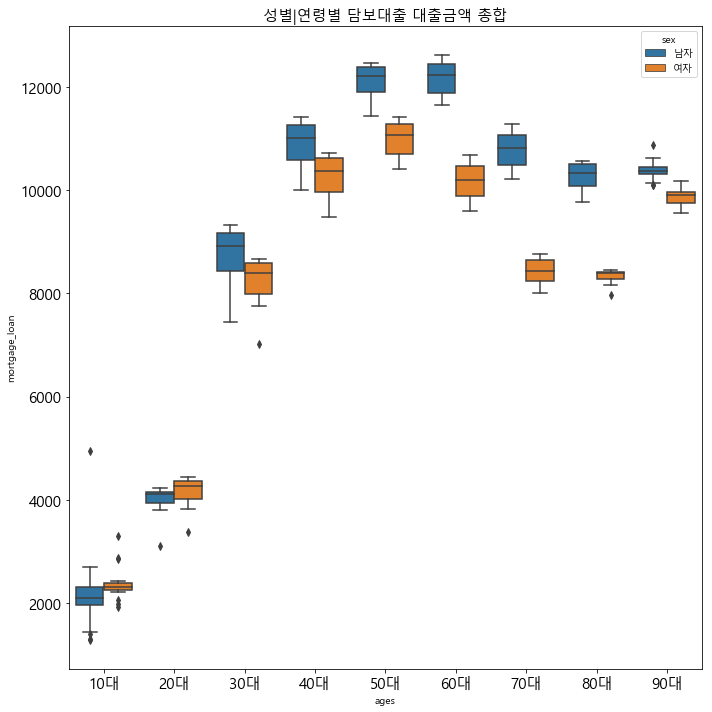

In [228]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='mortgage_loan',hue='sex', data=credit_1)
plt.title('성별|연령별 담보대출 대출금액 총합',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/mortgage_loan.jpg')

## credit_card_payment

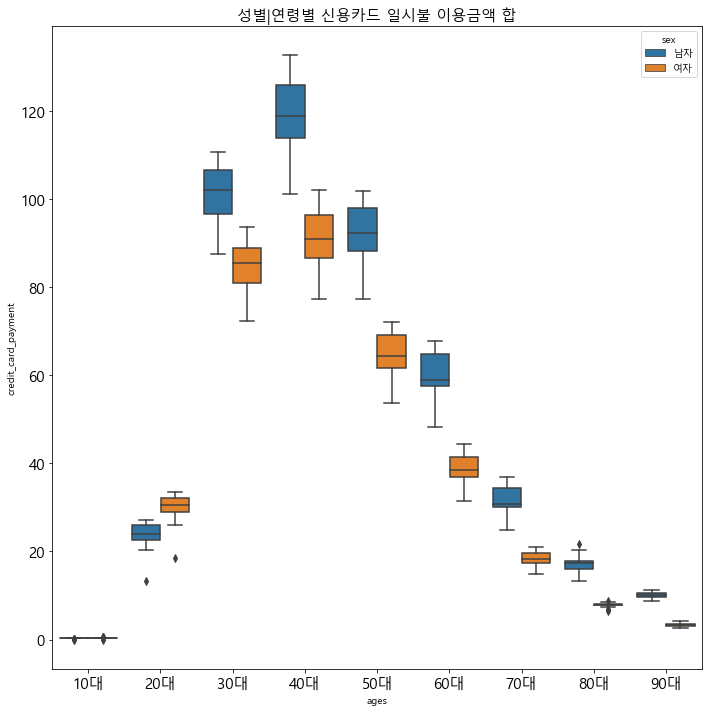

In [229]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='credit_card_payment',hue='sex', data=credit_1)
plt.title('성별|연령별 신용카드 일시불 이용금액 합',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/credit_card_payment.jpg')

## credit_card_installments_payment

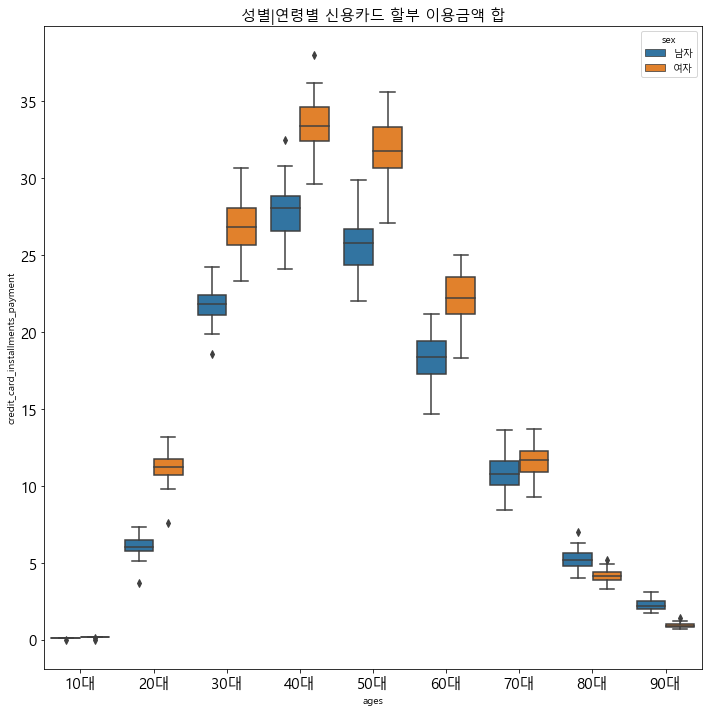

In [230]:
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15)
sns.boxplot(x='ages',y='credit_card_installments_payment',hue='sex', data=credit_1)
plt.title('성별|연령별 신용카드 할부 이용금액 합',fontsize=15)
plt.tight_layout()
plt.savefig('../images/ages_by_sex/credit_card_installments_payment.jpg')

## 대출금액 존재 여부

In [242]:
debt_features = ['monthly_lc', 'monthly_loan', 'monthly_bk_loan',
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan', 'loan_commitment',
       'inst_rep_loanb', 'ls_rep_loanb', 'credit_loan', 'mortgage_loan']

In [243]:
for f in debt_features:
    print(f)
    print(credit_1[f].apply(lambda x: 1 if x!=0 else 0).value_counts())
    print('='*50)

monthly_lc
1    432
Name: monthly_lc, dtype: int64
monthly_loan
1    432
Name: monthly_loan, dtype: int64
monthly_bk_loan
1    432
Name: monthly_bk_loan, dtype: int64
monthly_cd_loan
1    430
0      2
Name: monthly_cd_loan, dtype: int64
monthly_installments_loan
1    432
Name: monthly_installments_loan, dtype: int64
monthly_insurance_loan
1    430
0      2
Name: monthly_insurance_loan, dtype: int64
monthly_sbk_loan
1    430
0      2
Name: monthly_sbk_loan, dtype: int64
loan_commitment
1    432
Name: loan_commitment, dtype: int64
inst_rep_loanb
1    432
Name: inst_rep_loanb, dtype: int64
ls_rep_loanb
1    432
Name: ls_rep_loanb, dtype: int64
credit_loan
1    432
Name: credit_loan, dtype: int64
mortgage_loan
1    432
Name: mortgage_loan, dtype: int64


## 성별|연령별 관측치 수

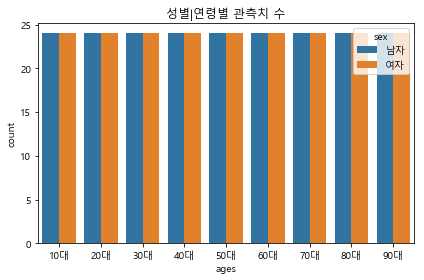

In [251]:
sns.countplot(x='ages', hue='sex', data=credit_1)
plt.title('성별|연령별 관측치 수')
plt.tight_layout()
plt.savefig('../images/ages_by_sex/ages_sex_count.jpg')

In [252]:
credit_1.shape

(432, 27)

In [253]:
credit_2.shape

(3456, 27)